<a id='content'></a>
# <center>Facebook Analyse</center>
Im Folgenden werden die via <b>Facebook API</b> extrahierten Daten ausgwertet und visualisiert. Die Einzelbetrachtung ermöglicht eine Einsicht in das Facebook Nutzungsverhalten konkreter Unternehmen. Der anschließende Gesamtvergleich vereint die einzelnen Datensätzen zu einem Gesamtdatensatz, welcher einen Überblick über das Verhalten innerhalb der betrachteten Konkurrenzunternehmen, (inklusive der Arend Prozessautomation Gmbh selbst) stellvertretend für den Mittelstand, ermöglicht.

Als Vergleichsunternehmen dienen die großen Unternehmen <b>Beckhoff Automation</b> sowie die <b>Pilz GmbH & Co. KG</b>, welche ebenfalls in der Automationsbranche tätig sind und bereits größere Social Media Kanäle etabliert haben.
Die Gegenüberstellung der betrachteten Mittelständler mit den beiden Vergleichsunternehmen zeigt Unterschiede und Gemeinsamkeiten im Nutzungsverhalten in übersichtlichen Diagrammen auf.

Die aufgeführten Graphen/Grafiken dienen als Grundlage zur Ausformulierung der Bachelorarbeit.

Alle Berechnungen, Visualisierungen und Datenerhebungen wurden mit Hilfe der Programmiersprache <i>Python</i> durchgeführt.

<u>Stand:</u> 13. Januar 2017
## <center>Inhaltsverzeichnis</center>
<br>
<i>Einzelansicht</i>
<li><a href='#arend'>Arend Prozessautomation GmbH</a></li>
<li><a href='#blumenbecker'>Blumenbecker Group</a></li>
<li><a href='#koehl'>koehl Unternehmensgruppe</a></li>
<li><a href='#ksv'>Koblenzer Steuerungs- und Verteilungsbau GmbH</a></li>
<li><a href='#natus'>Natus GmbH & Co. KG</a></li>

<i>Vergleichsunternehmen</i>
<li><a href='#beckhoff'>Beckhoff Automation</a></li>
<li><a href='#pilz'>Pilz GmbH & Co. KG</a></li>
<br>
<li><a href='#arendvskonkurrenz'>Vergleich Arend vs. Konkurrenz</a></li>
<li><a href='#branche'>Vergleich Mittelstand vs. Größere Unternehmen</a></li>
<br>
<li><a href='#gesamtdaten'>Gesamtdatensatz</a></li>



In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

from matplotlib.pyplot import pie, axis, show

%matplotlib inline

In [7]:
arend = pd.read_csv('arend_facebook.csv')
koehl = pd.read_csv('köhl_facebook.csv')
natus = pd.read_csv('natus_facebook.csv')
blumenbecker = pd.read_csv('blumenbecker_facebook.csv')
ksv = pd.read_csv('ksv_facebook.csv')

ms = pd.concat([arend, koehl, natus, blumenbecker, ksv])

#vergleichsunternehmen
beckhoff = pd.read_csv('beckhoff_facebook.csv')
pilz = pd.read_csv('pilz_facebook.csv')

vu = pd.concat([beckhoff, pilz])

total = pd.concat([ms, vu])
total.to_csv("total.csv")

---
<a id='arend'></a>
# <center>AREND PROZESSAUTOMATION GMBH</center>
---

In [8]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(arend)))

Insgesamt 82 Beiträge zu analysieren.


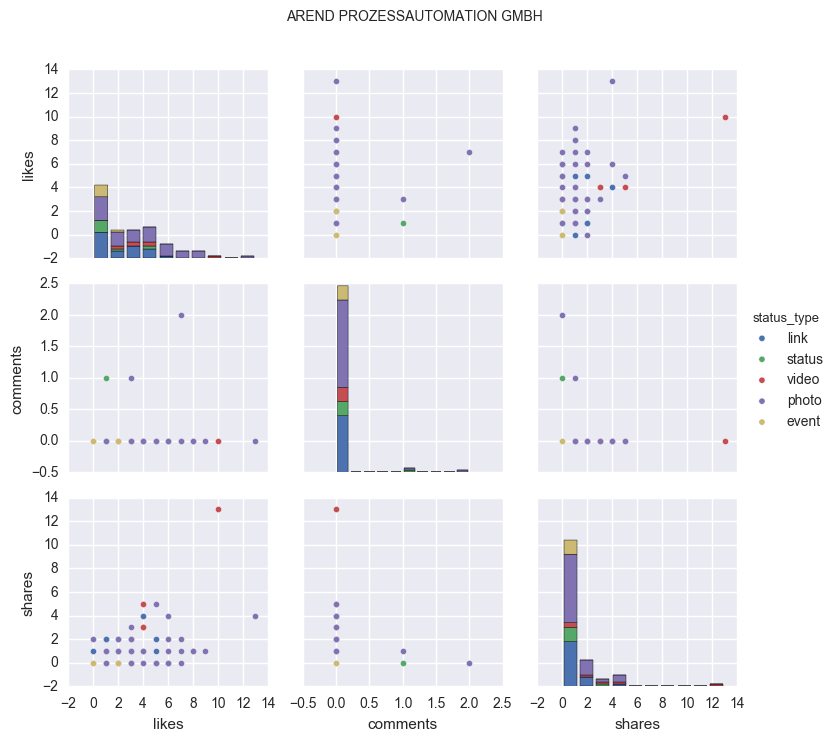

In [9]:
g = sns.pairplot(arend, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('AREND PROZESSAUTOMATION GMBH')

##### POST TYPE DISTRIBUTION

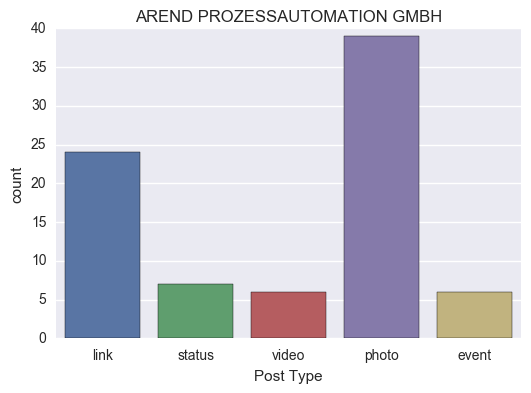

In [10]:
fig, ax = plt.subplots()
sns.countplot(x='status_type', data=arend, ax=ax)

ax.set_title('AREND PROZESSAUTOMATION GMBH')
ax.set_xlabel('Post Type')
fig.savefig('Arend_Type_Distribution.png', dpi=300)

#####  DISTRIBUTION OVER TIME

In [11]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in arend['status_published']]
likes = arend['likes']
shares = arend['shares']
comments = arend['comments']

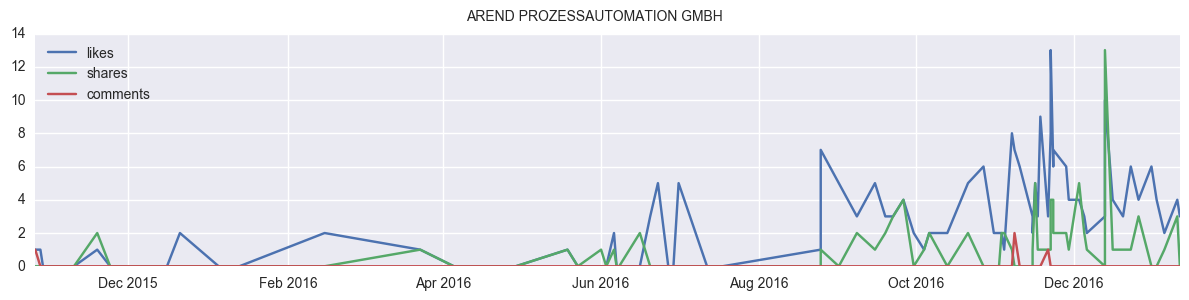

In [12]:
fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)
fig1.suptitle('AREND PROZESSAUTOMATION GMBH')

fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

fig1.savefig('Arend_Timeline.png', dpi=300)

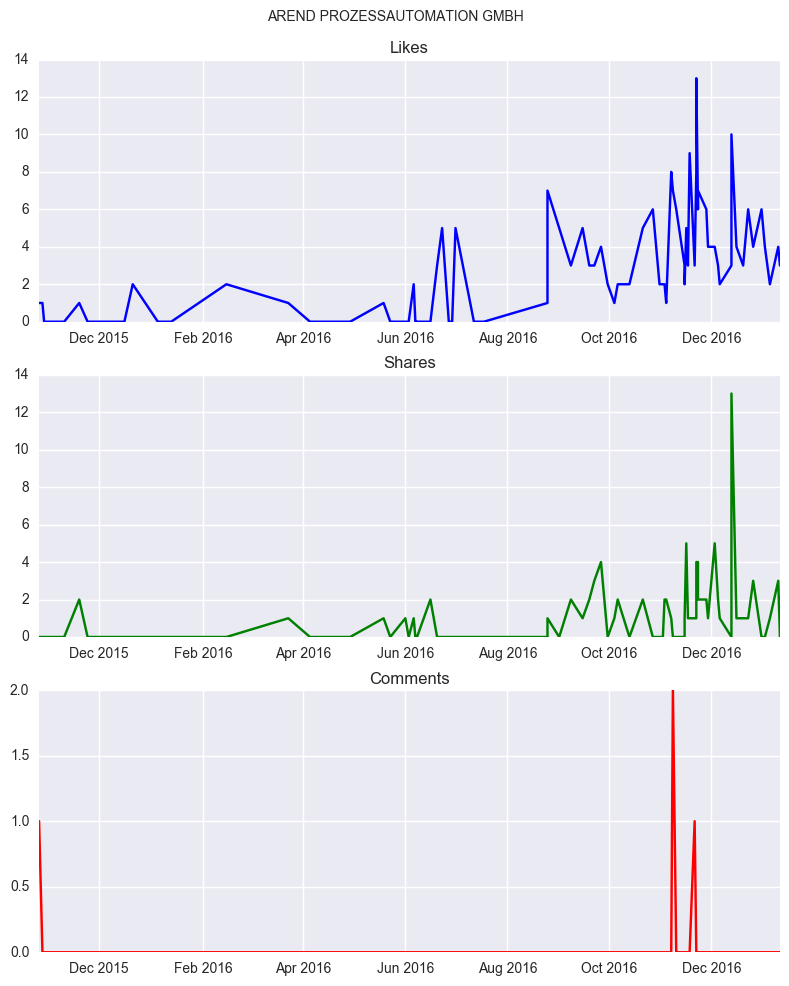

In [13]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))


axes[0].plot(dates,likes, 'b', label='likes')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('AREND PROZESSAUTOMATION GMBH')
fig2.tight_layout()
fig2.subplots_adjust(top=0.93)

In [14]:
#fig2.savefig('arend.png', dpi=200)

#### LIKES

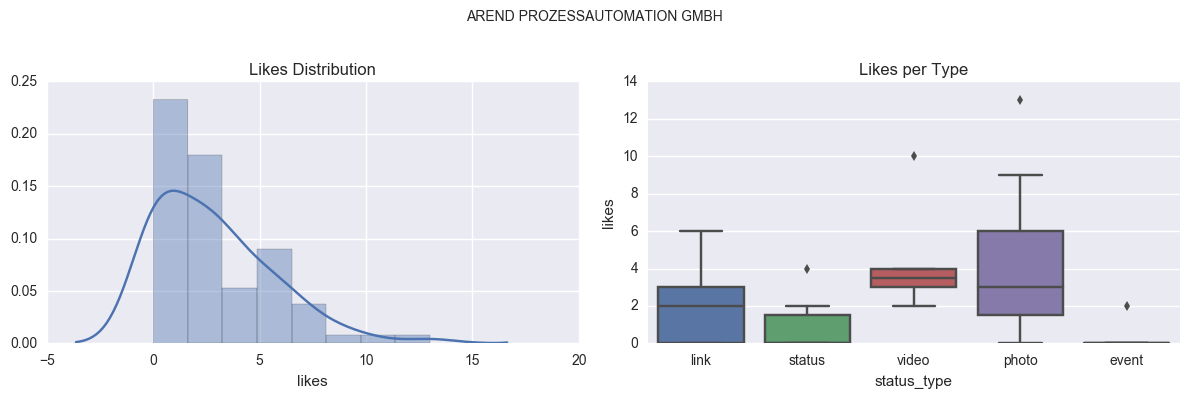

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(arend['likes'], ax=ax1)
ax1.set_title('Likes Distribution')
sns.boxplot(x='status_type', y='likes', data=arend, ax=ax2)
ax2.set_title('Likes per Type')
fig.suptitle('AREND PROZESSAUTOMATION GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

fig.savefig('Arend_likes_distribution.png', dpi=300)

#### SHARES

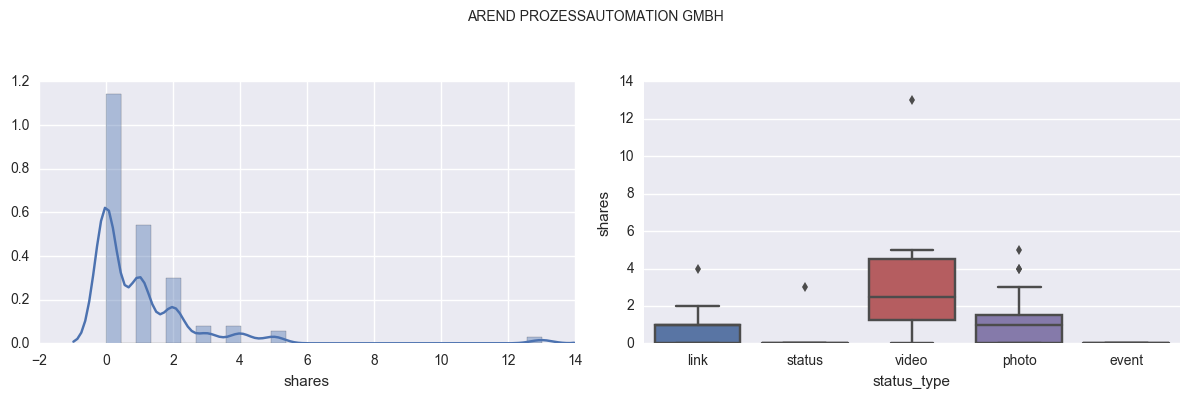

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(arend['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=arend, ax=ax2)

fig.suptitle('AREND PROZESSAUTOMATION GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('arend_shares_distribution.png', dpi=300)

#### COMMENTS

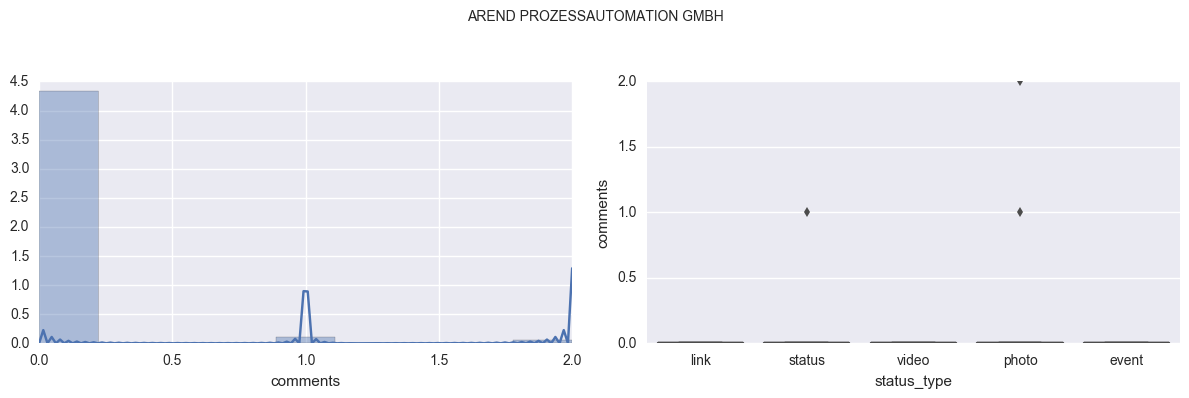

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(arend['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=arend, ax=ax2)

fig.suptitle('AREND PROZESSAUTOMATION GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('arend_comments_distribution.png', dpi=300)

---
<a id='blumenbecker'></a>
# <center>BLUMENBECKER GROUP</center>
---

In [18]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(blumenbecker)))

Insgesamt 581 Beiträge zu analysieren.


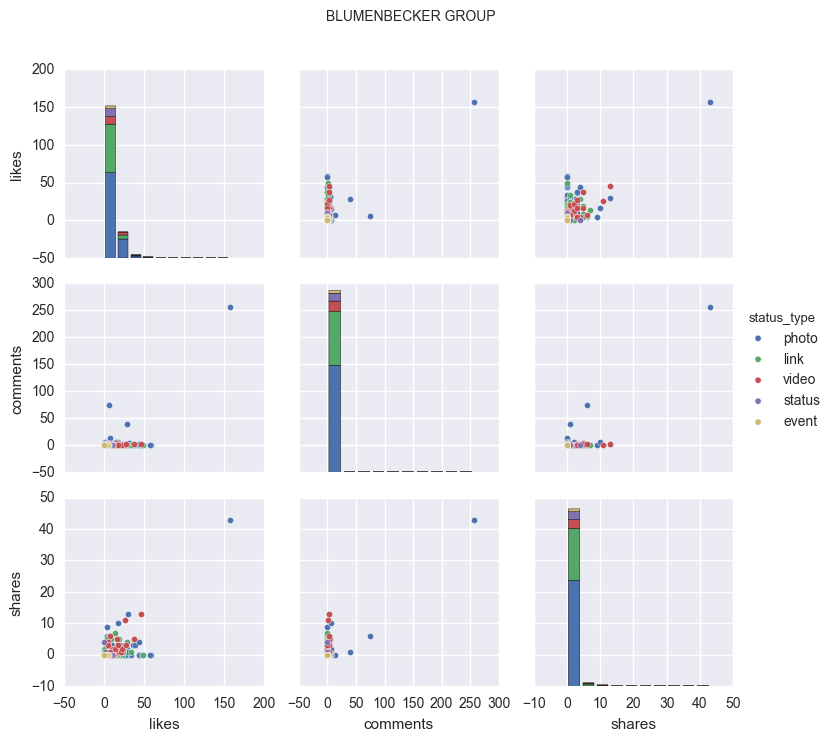

In [19]:
g = sns.pairplot(blumenbecker, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('BLUMENBECKER GROUP')

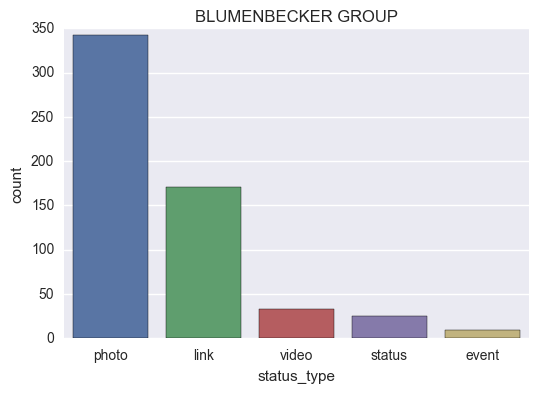

In [20]:
ax = plt.axes()
sns.countplot(x='status_type', data=blumenbecker, ax=ax)

ax.set_title('BLUMENBECKER GROUP')

In [21]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in blumenbecker['status_published']]
likes = blumenbecker['likes']
shares = blumenbecker['shares']
comments = blumenbecker['comments']

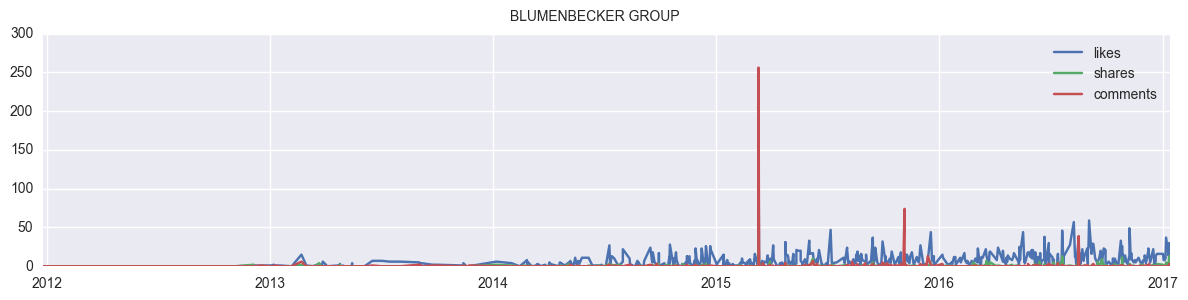

In [22]:
fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)

fig1.suptitle('BLUMENBECKER GROUP')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

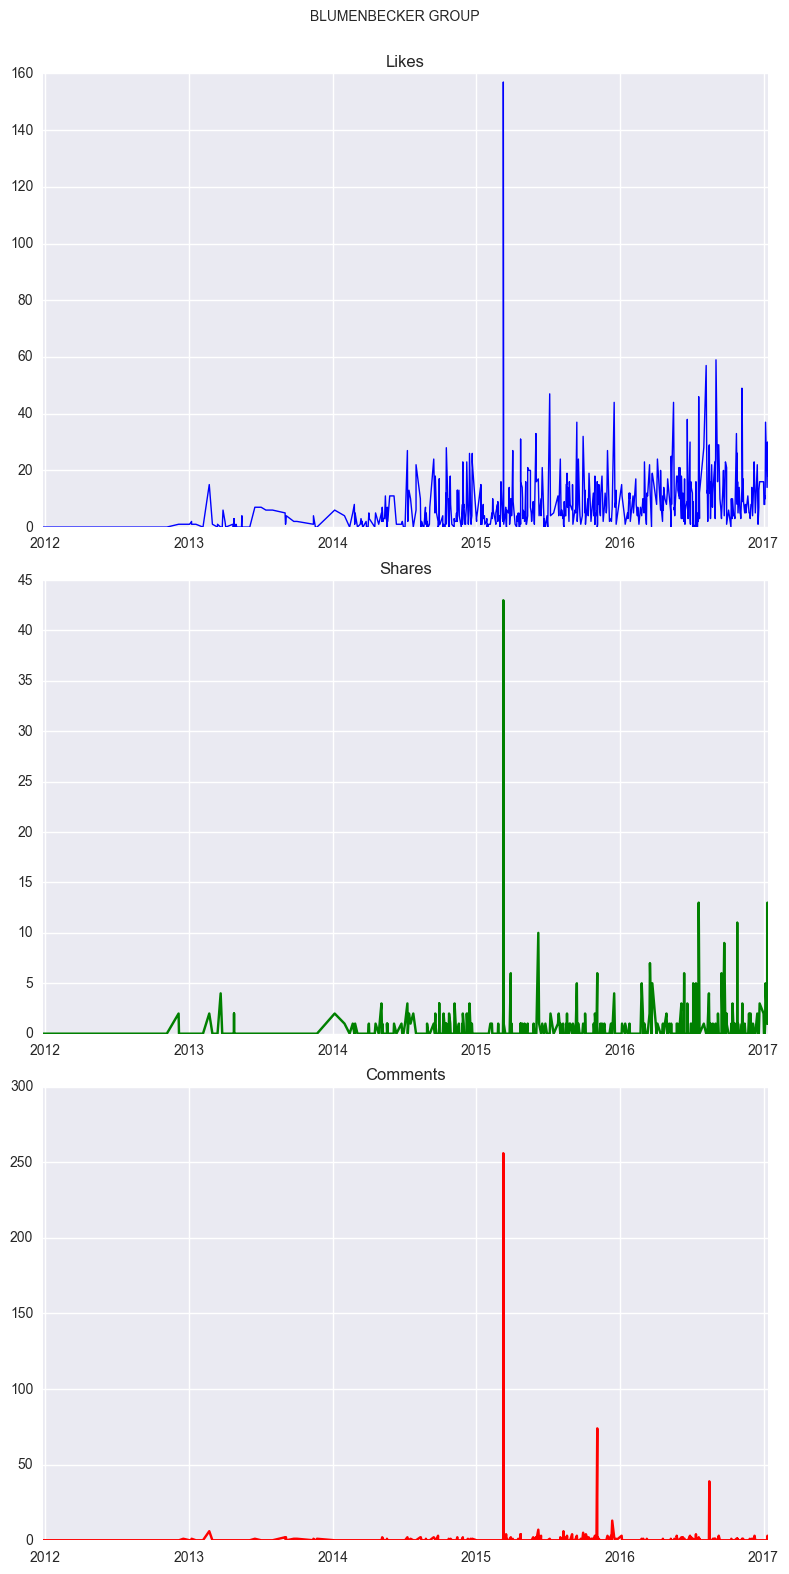

In [23]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('BLUMENBECKER GROUP')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

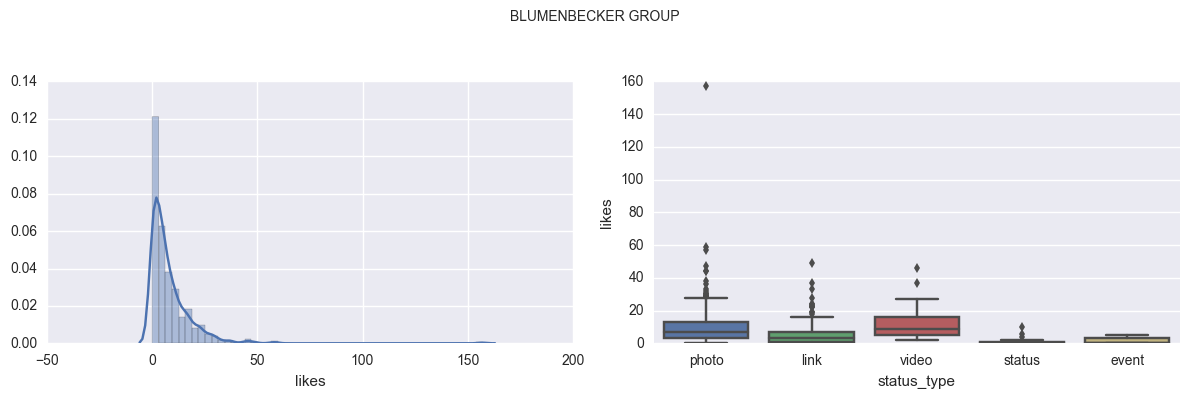

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(blumenbecker['likes'], ax=ax1)
sns.boxplot(x='status_type', y='likes', data=blumenbecker, ax=ax2)

fig.suptitle('BLUMENBECKER GROUP')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

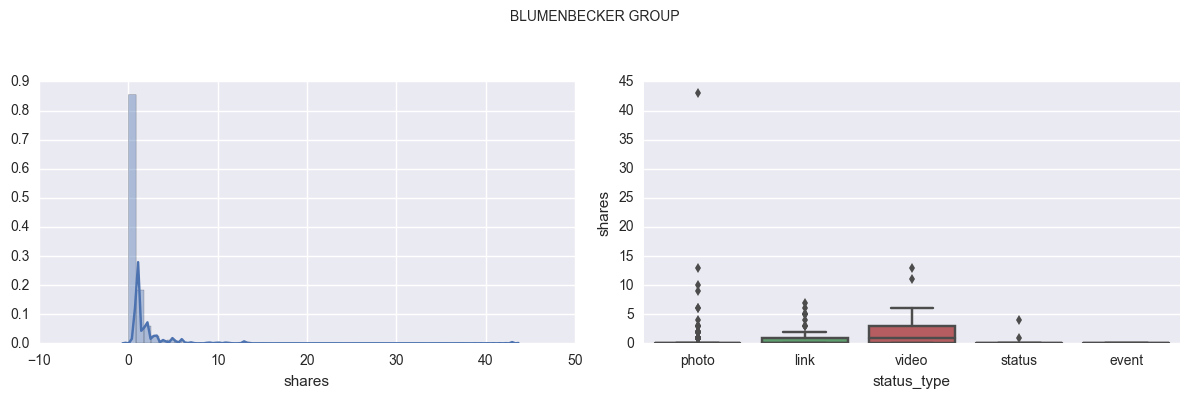

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(blumenbecker['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=blumenbecker, ax=ax2)

fig.suptitle('BLUMENBECKER GROUP')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

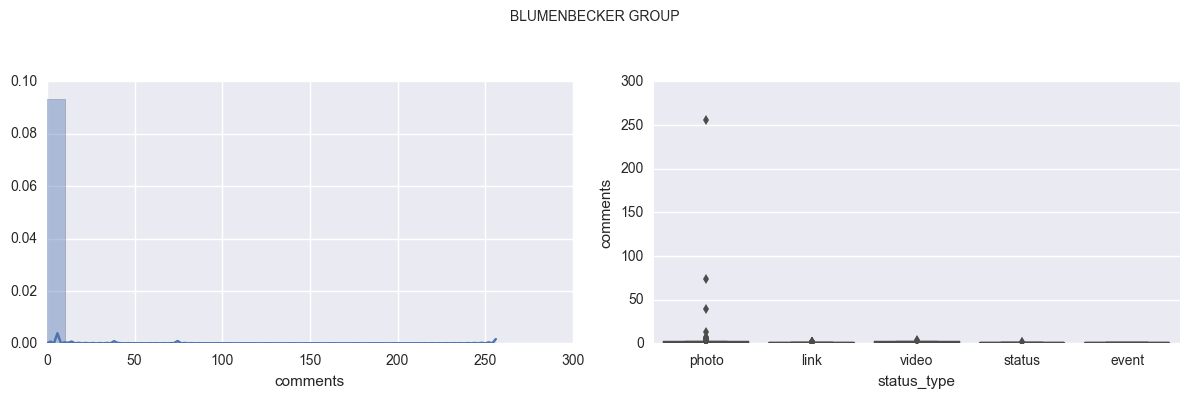

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(blumenbecker['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=blumenbecker, ax=ax2)

fig.suptitle('BLUMENBECKER GROUP')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='koehl'></a>
# <center>koehl Unternehmensgruppe</center>
---

In [27]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(koehl)))

Insgesamt 69 Beiträge zu analysieren.


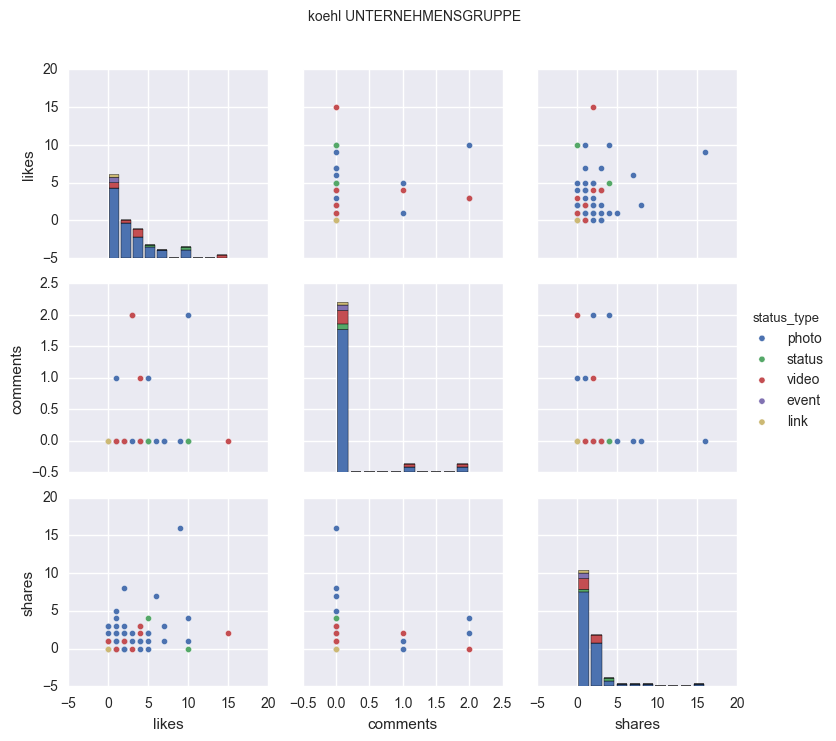

In [28]:
g = sns.pairplot(koehl, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('koehl UNTERNEHMENSGRUPPE')

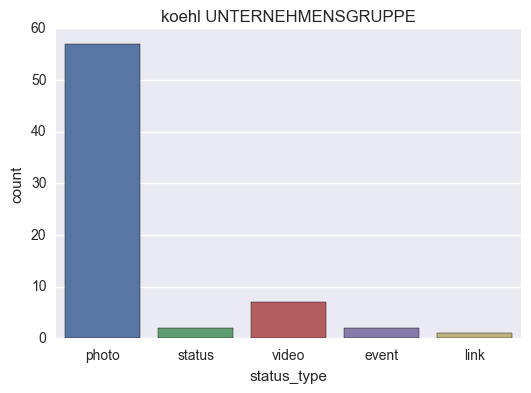

In [29]:
ax = plt.axes()
sns.countplot(x='status_type', data=koehl, ax=ax)

ax.set_title('koehl UNTERNEHMENSGRUPPE')

In [30]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in koehl['status_published']]
likes = koehl['likes']
shares = koehl['shares']
comments = koehl['comments']

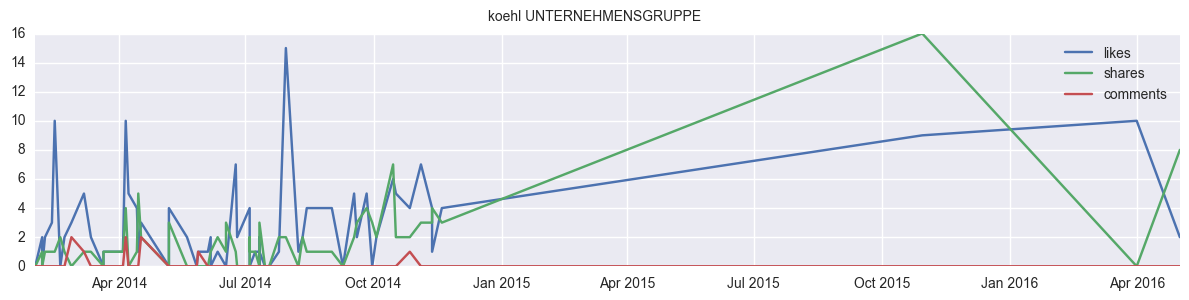

In [31]:
fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)

fig1.suptitle('koehl UNTERNEHMENSGRUPPE')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

<center><i><u>Anmerkung:</u></i> Sprunghafter Verlauf, da seit Ende 2014 fast keine Posts mehr erfolgen.</center>

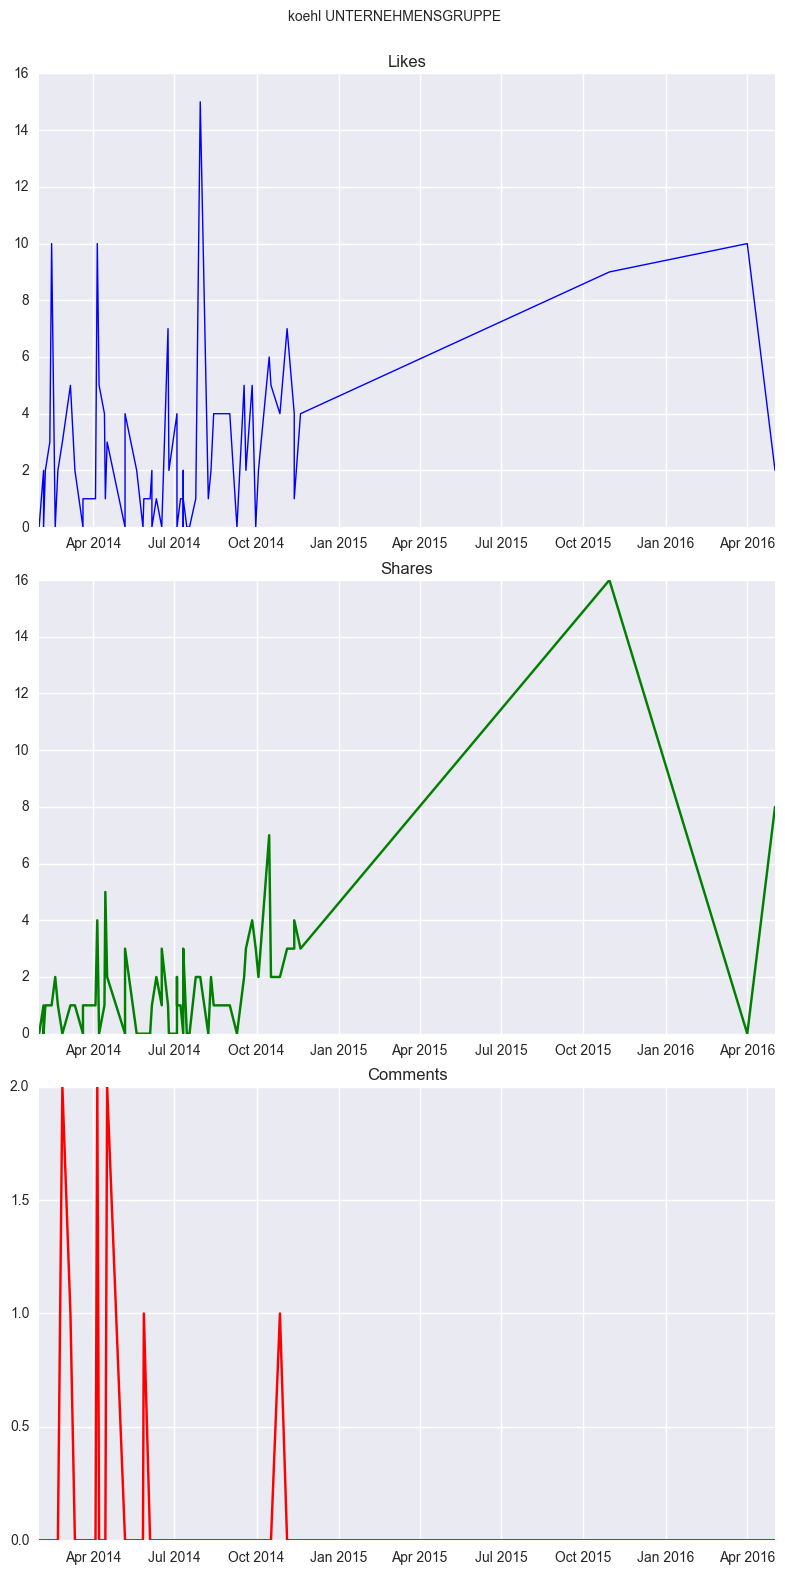

In [32]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('koehl UNTERNEHMENSGRUPPE')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

<center><i><u>Anmerkung:</u></i> Sprunghafter Verlauf, da seit Ende 2014 fast keine Posts mehr erfolgen.</center>

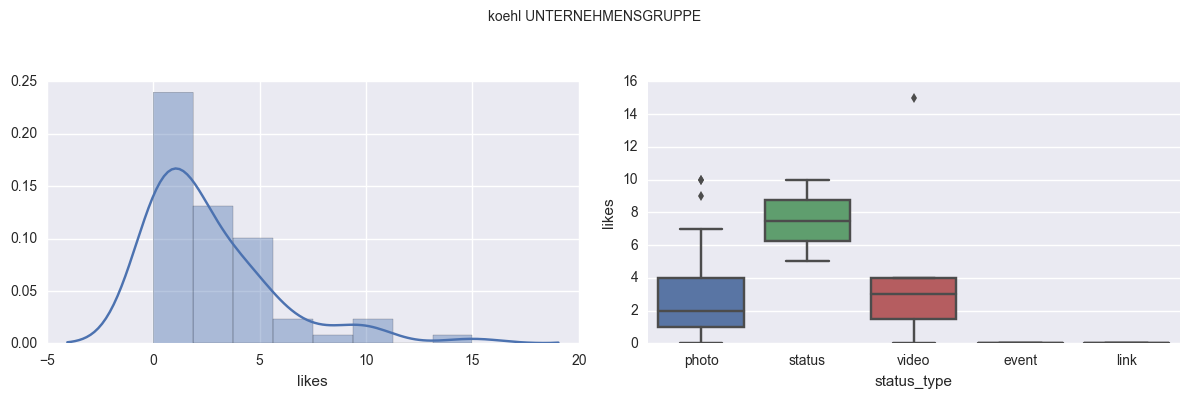

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(koehl['likes'], ax=ax1)
sns.boxplot(x='status_type', y='likes', data=koehl, ax=ax2)

fig.suptitle('koehl UNTERNEHMENSGRUPPE')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

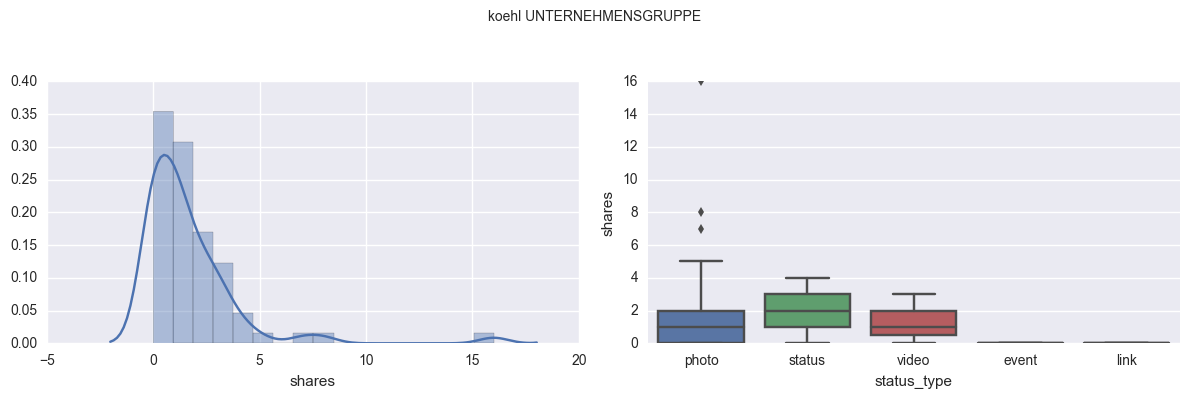

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(koehl['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=koehl, ax=ax2)

fig.suptitle('koehl UNTERNEHMENSGRUPPE')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

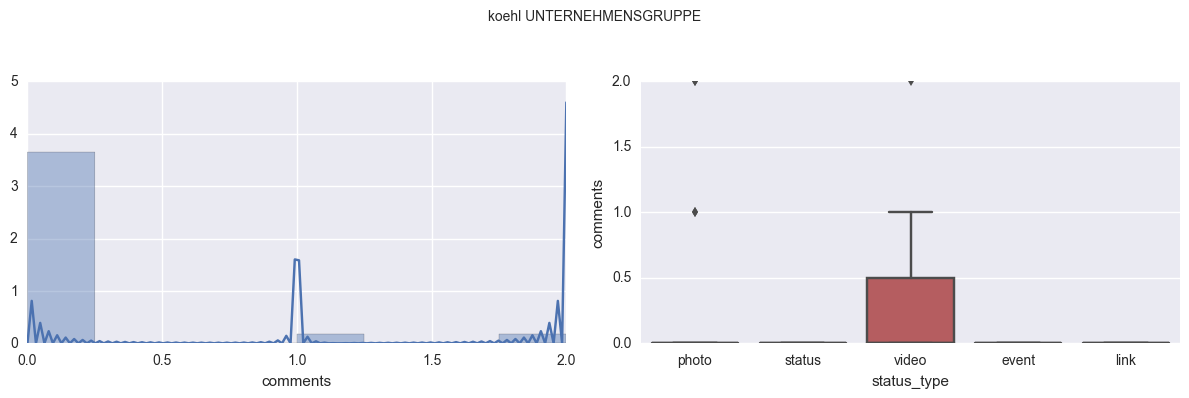

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(koehl['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=koehl, ax=ax2)

fig.suptitle('koehl UNTERNEHMENSGRUPPE')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='ksv'></a>
# <center>Koblenzer Steuerungs-und Verteilungsbau GmbH</center>
---

<center><i><u>Anmerkung:</u></i> Keine/Geringe Aussagekraft, da lediglich 2 Posts insgesamt.</center>

In [36]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(ksv)))

Insgesamt 2 Beiträge zu analysieren.


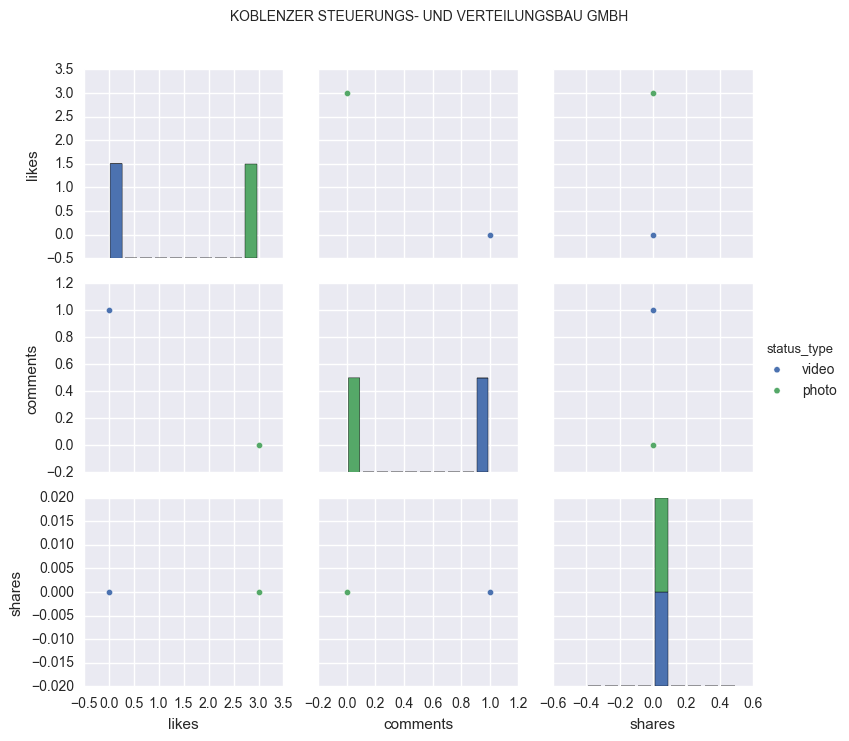

In [37]:
g = sns.pairplot(ksv, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')

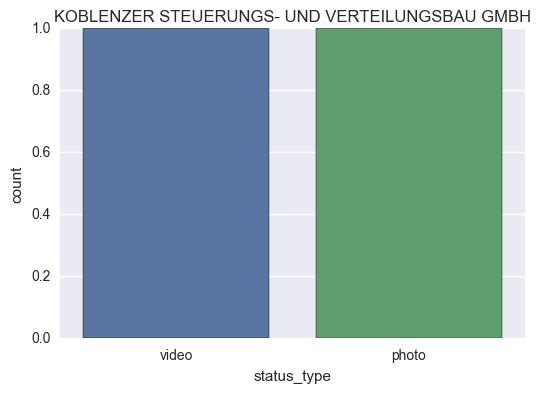

In [38]:
ax = plt.axes()
sns.countplot(x='status_type', data=ksv, ax=ax)

ax.set_title('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')

In [39]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in ksv['status_published']]
likes = ksv['likes']
shares = ksv['shares']
comments = ksv['comments']

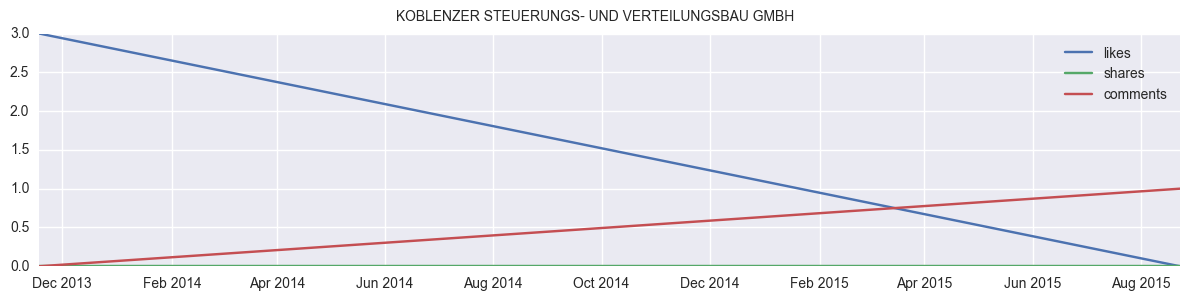

In [40]:
fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)

fig1.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

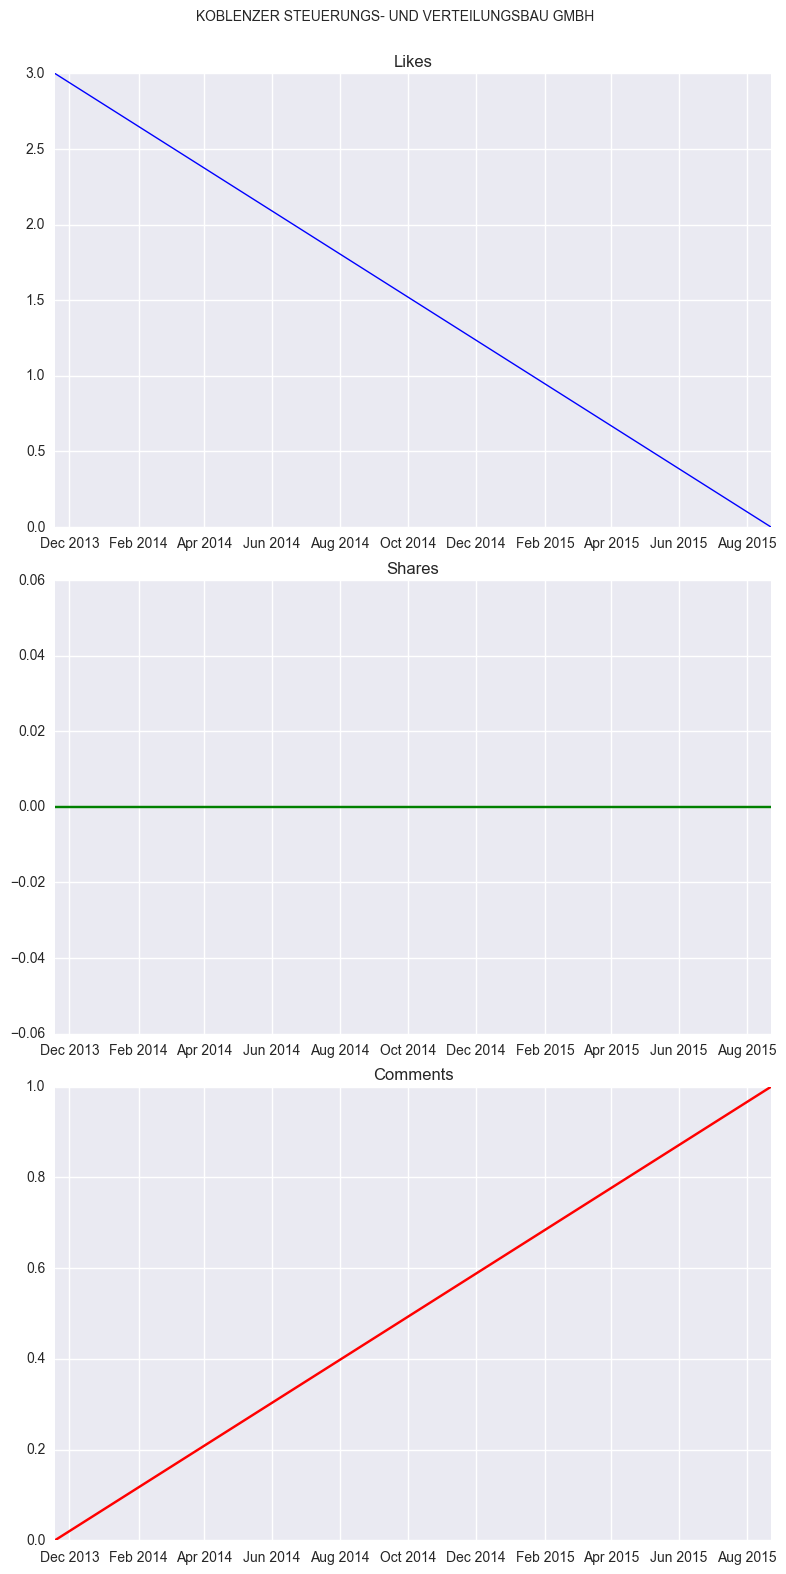

In [41]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

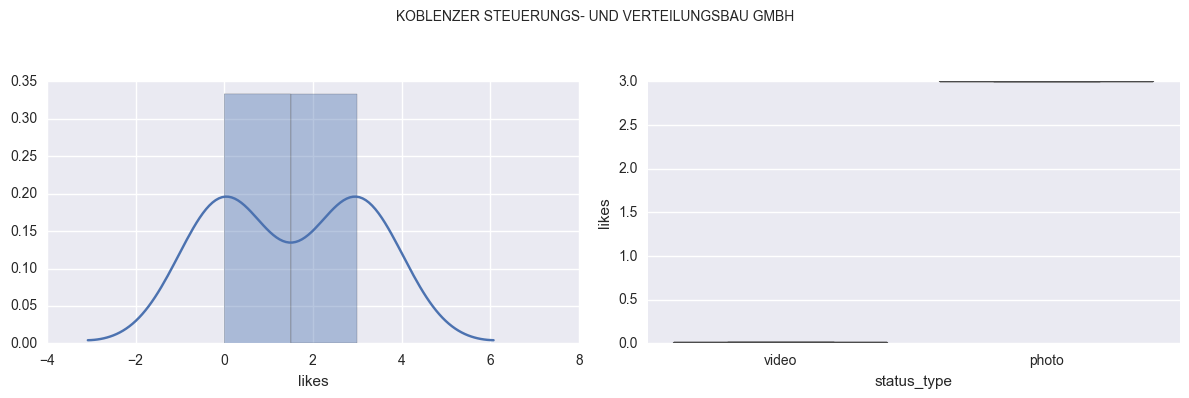

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(ksv['likes'], ax=ax1)
sns.boxplot(x='status_type', y='likes', data=ksv, ax=ax2)

fig.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

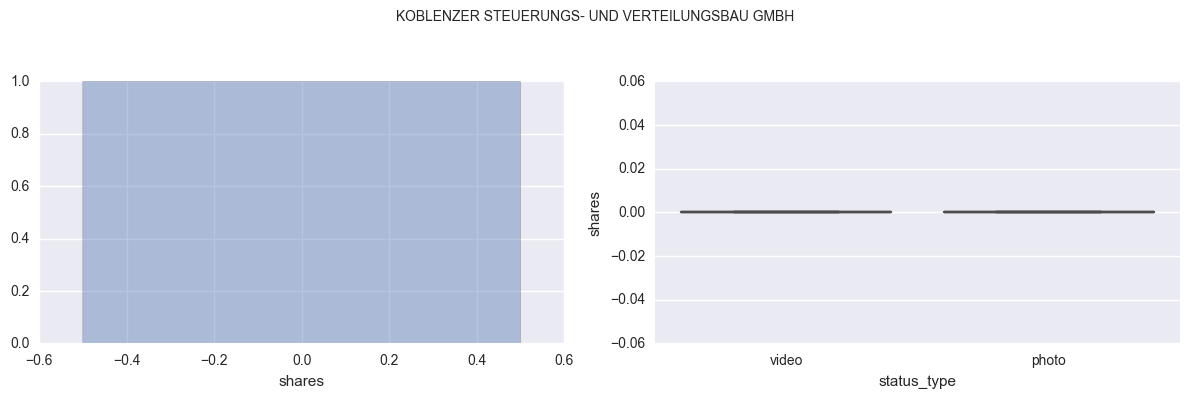

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(ksv['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=ksv, ax=ax2)

fig.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

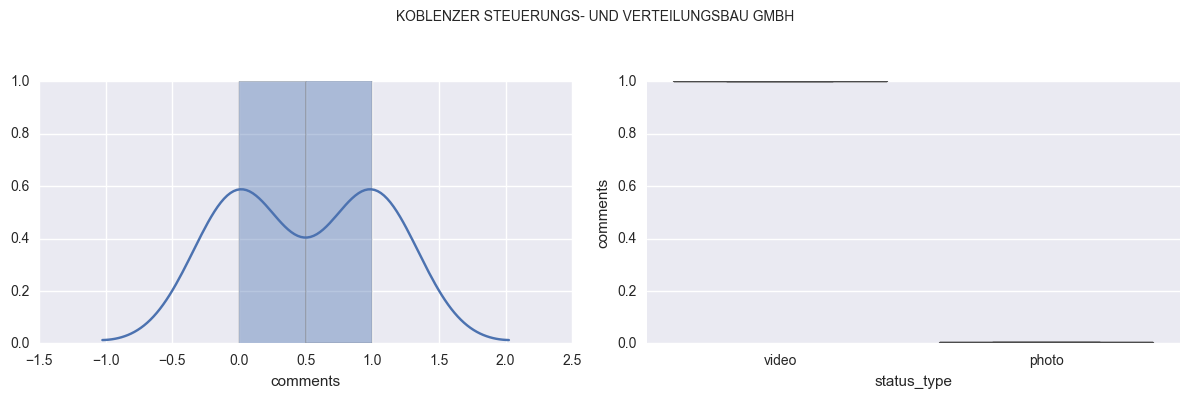

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(ksv['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=ksv, ax=ax2)

fig.suptitle('KOBLENZER STEUERUNGS- UND VERTEILUNGSBAU GMBH')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='natus'></a>
# <center>Natus GmbH & Co. KG Nederland</center>
---

<center><i><u>Anmerkung:</u></i> Geringe Aussagekraft, da lediglich 9 Posts insgesamt.</center>

In [45]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(natus)))

Insgesamt 9 Beiträge zu analysieren.


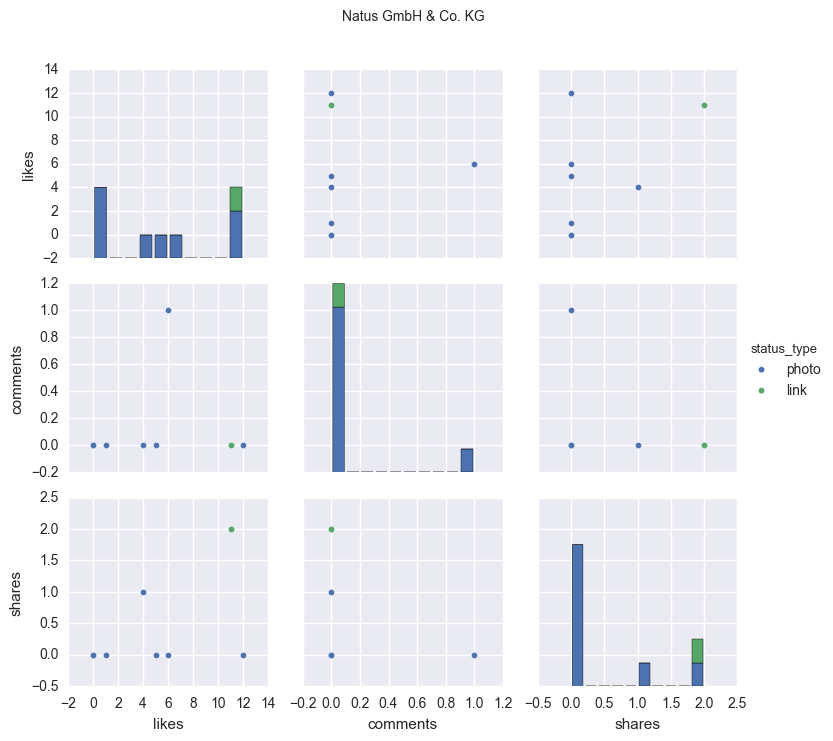

In [46]:
g = sns.pairplot(natus, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Natus GmbH & Co. KG')

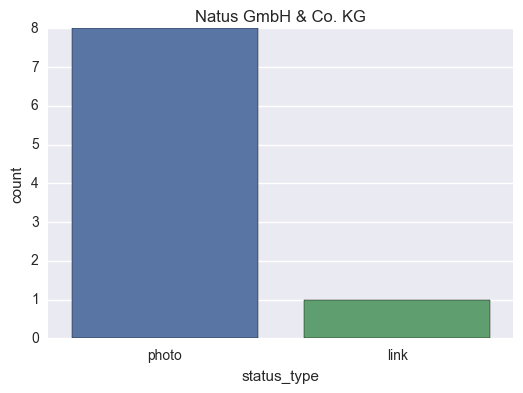

In [47]:
ax = plt.axes()
sns.countplot(x='status_type', data=natus, ax=ax)

ax.set_title('Natus GmbH & Co. KG')

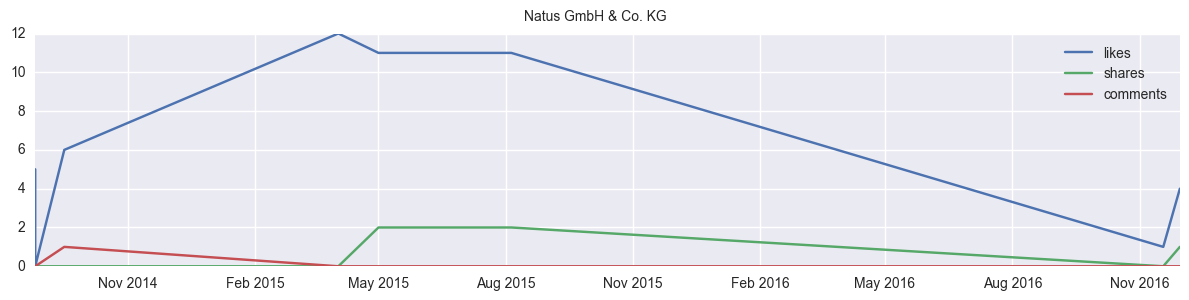

In [48]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in natus['status_published']]
likes = natus['likes']
shares = natus['shares']
comments = natus['comments']

fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)

fig1.suptitle('Natus GmbH & Co. KG')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

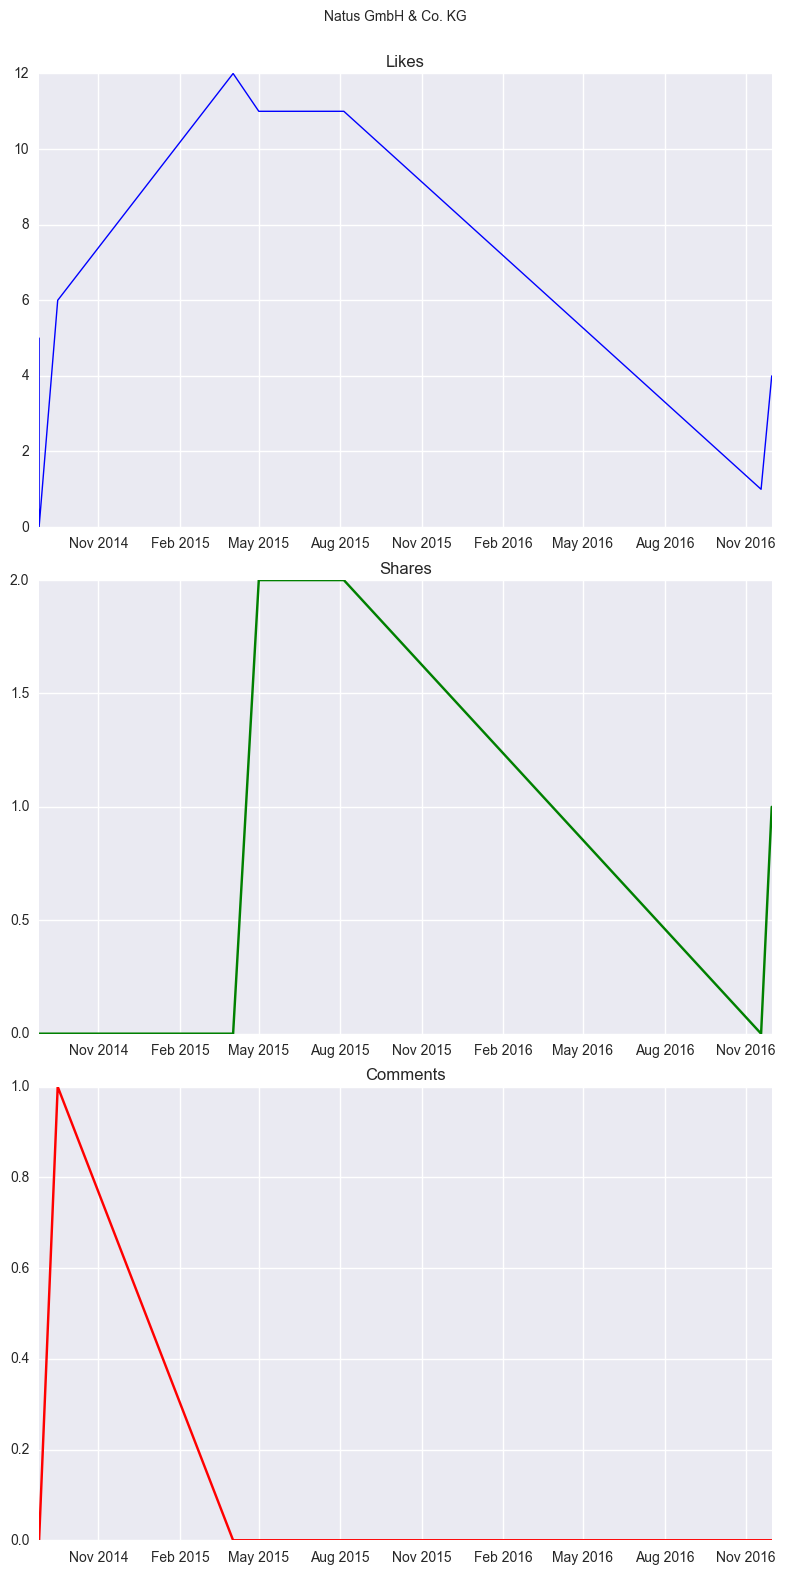

In [49]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('Natus GmbH & Co. KG')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

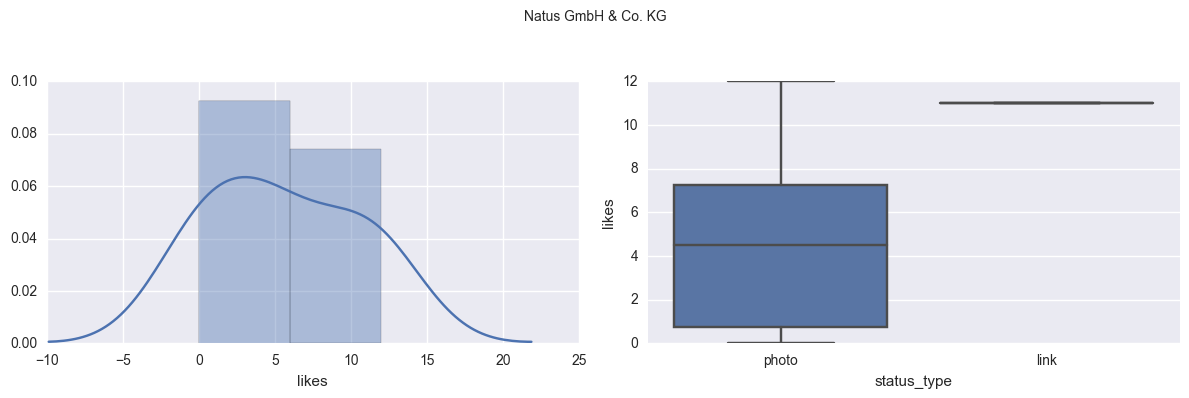

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(natus['likes'], ax=ax1)
sns.boxplot(x='status_type', y='likes', data=natus, ax=ax2)

fig.suptitle('Natus GmbH & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

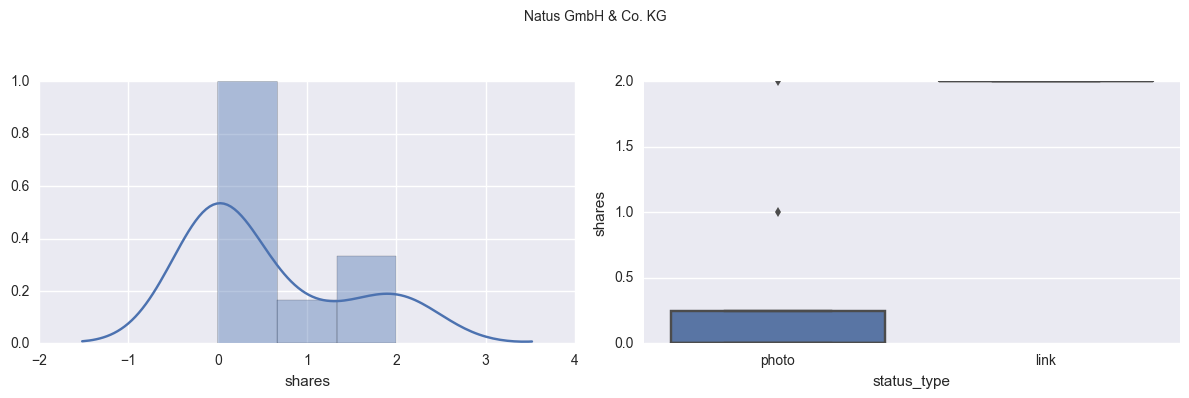

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(natus['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=natus, ax=ax2)

fig.suptitle('Natus GmbH & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

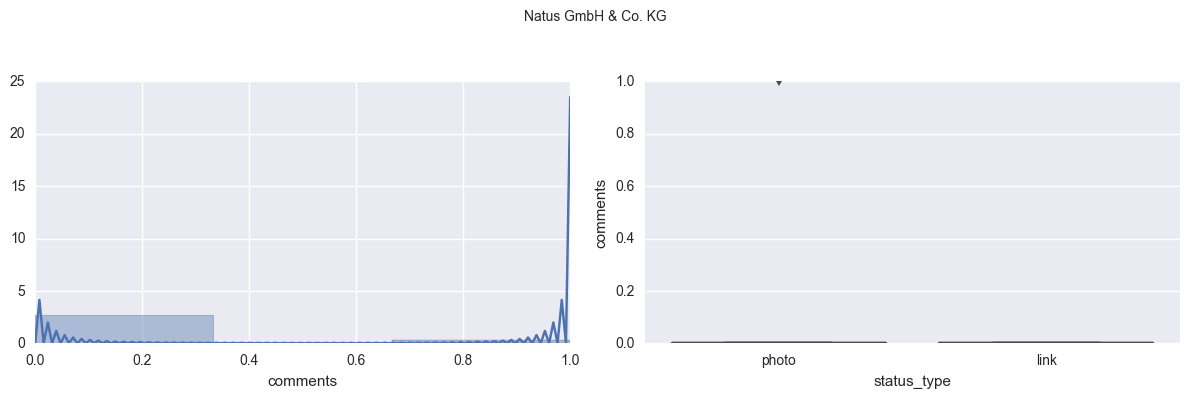

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(natus['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=natus, ax=ax2)

fig.suptitle('Natus GmbH & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='beckhoff'></a>
# <center>Beckhoff Automation</center>
---

In [53]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(beckhoff)))

Insgesamt 477 Beiträge zu analysieren.


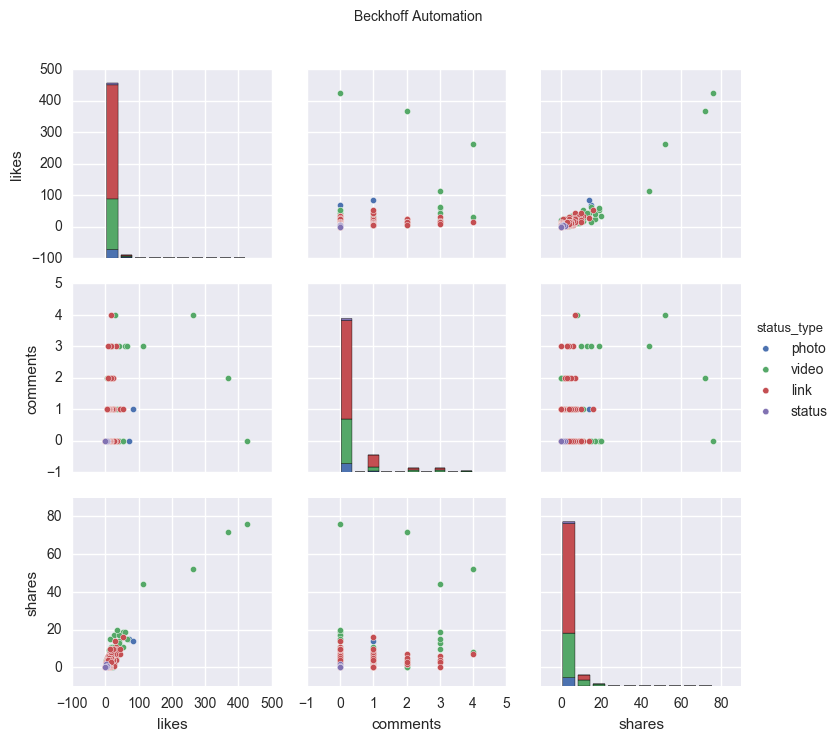

In [54]:
g = sns.pairplot(beckhoff, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Beckhoff Automation')

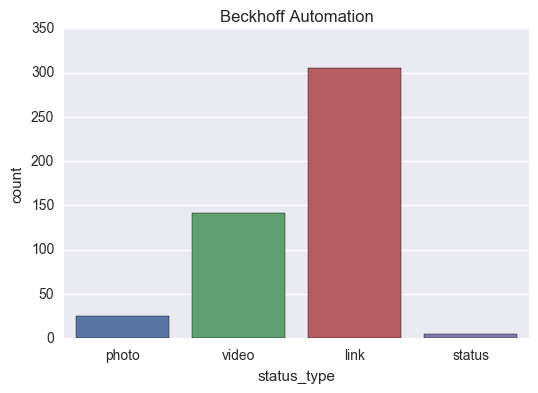

In [55]:
ax = plt.axes()
sns.countplot(x='status_type', data=beckhoff, ax=ax)

ax.set_title('Beckhoff Automation')

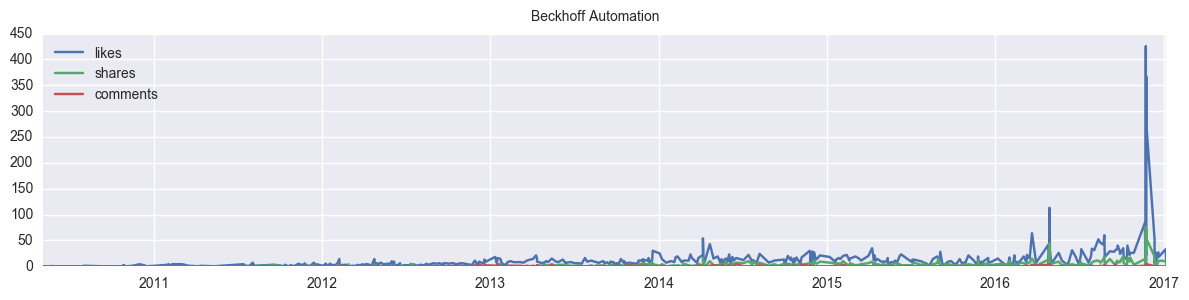

In [56]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in beckhoff['status_published']]
likes = beckhoff['likes']
shares = beckhoff['shares']
comments = beckhoff['comments']

fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.legend(loc=0)

fig1.suptitle('Beckhoff Automation')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

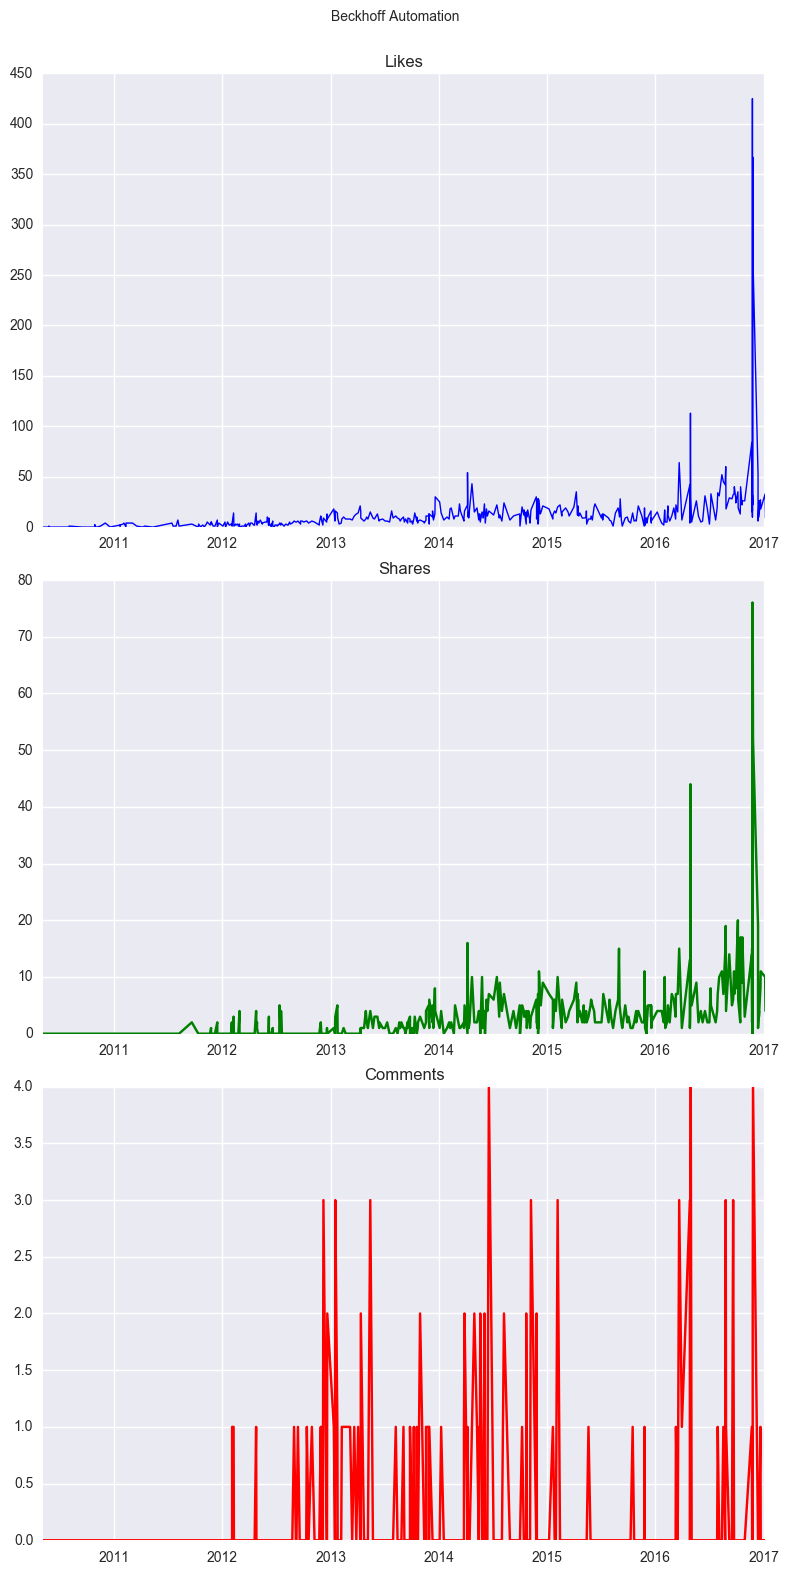

In [57]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('Beckhoff Automation')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

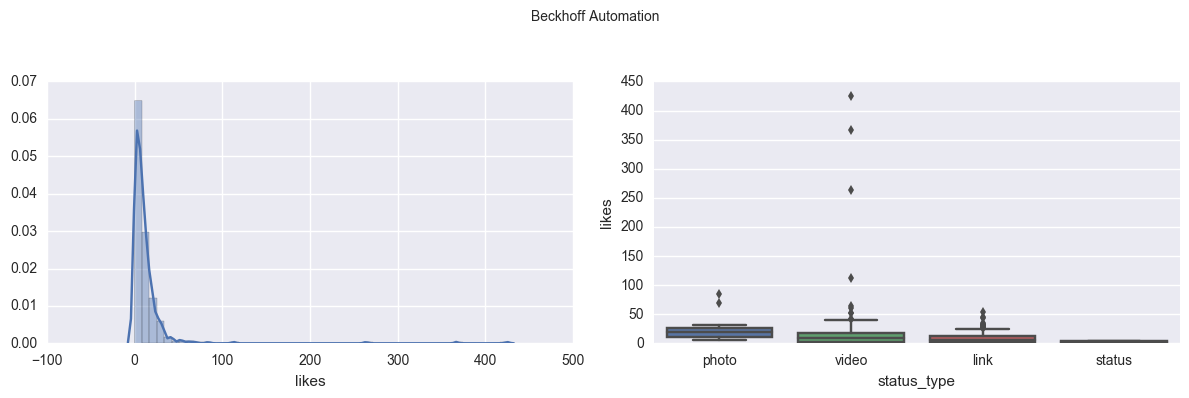

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(beckhoff['likes'], ax=ax1)
sns.boxplot(x='status_type', y='likes', data=beckhoff, ax=ax2)

fig.suptitle('Beckhoff Automation')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

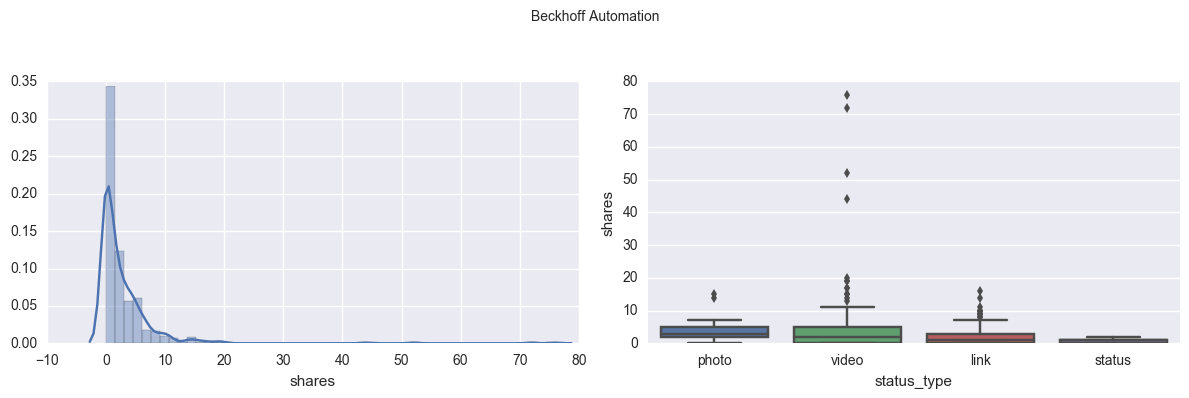

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(beckhoff['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=beckhoff, ax=ax2)

fig.suptitle('Beckhoff Automation')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

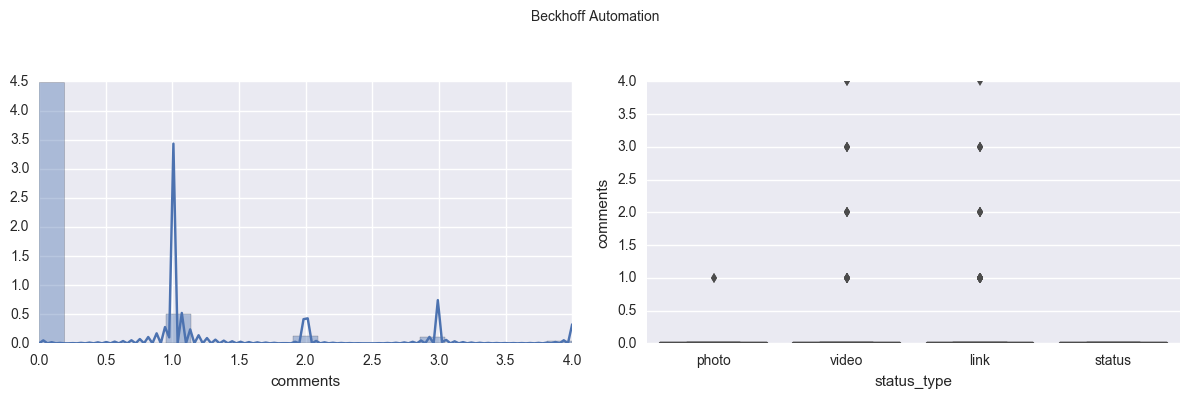

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(beckhoff['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=beckhoff, ax=ax2)

fig.suptitle('Beckhoff Automation')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='pilz'></a>
# <center>Pilz Gmbh & Co. KG</center>
---

In [61]:
print('Insgesamt {posts} Beiträge zu analysieren.'.format(posts=len(pilz)))

Insgesamt 908 Beiträge zu analysieren.


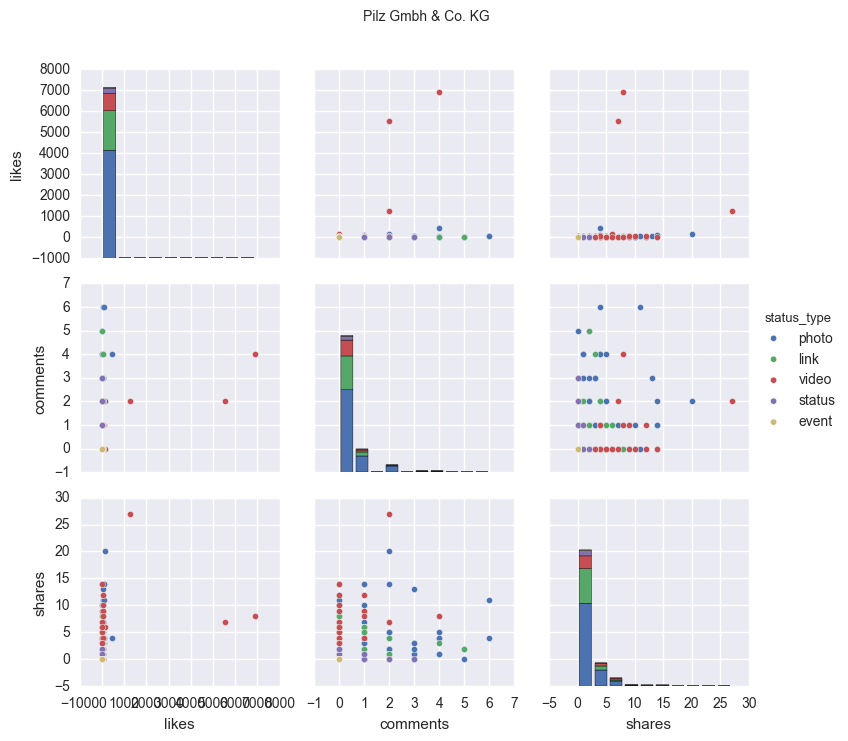

In [62]:
g = sns.pairplot(pilz, hue='status_type')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pilz Gmbh & Co. KG')

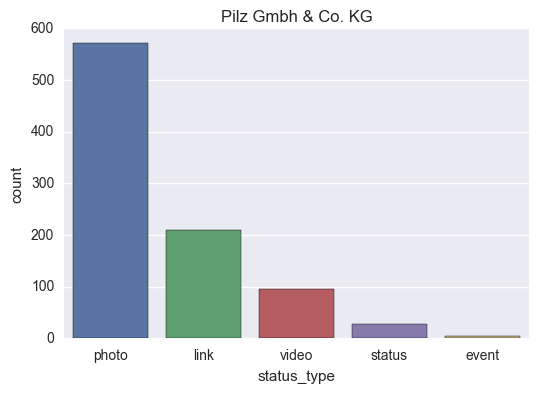

In [63]:
ax = plt.axes()
sns.countplot(x='status_type', data=pilz, ax=ax)

ax.set_title('Pilz Gmbh & Co. KG')

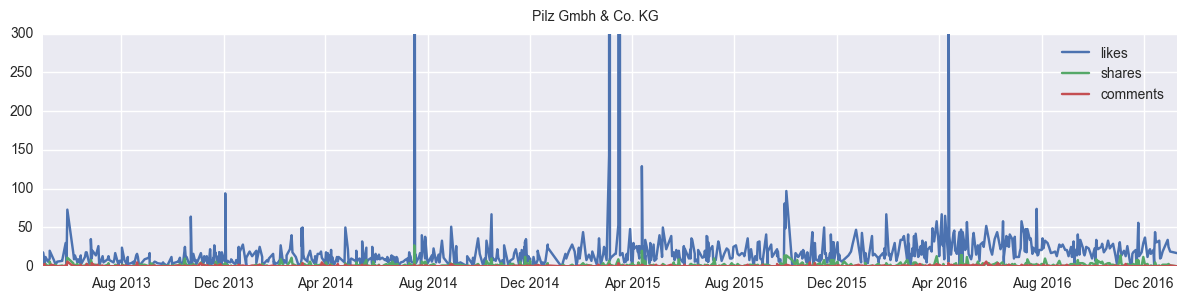

In [64]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in pilz['status_published']]
likes = pilz['likes']
shares = pilz['shares']
comments = pilz['comments']

fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
axes.plot(dates,likes, label='likes')
axes.plot(dates,shares, label='shares')
axes.plot(dates,comments, label='comments')

axes.set_ylim(0, 300)

axes.legend(loc=0)

fig1.suptitle('Pilz Gmbh & Co. KG')
fig1.tight_layout()
fig1.subplots_adjust(top=0.9)

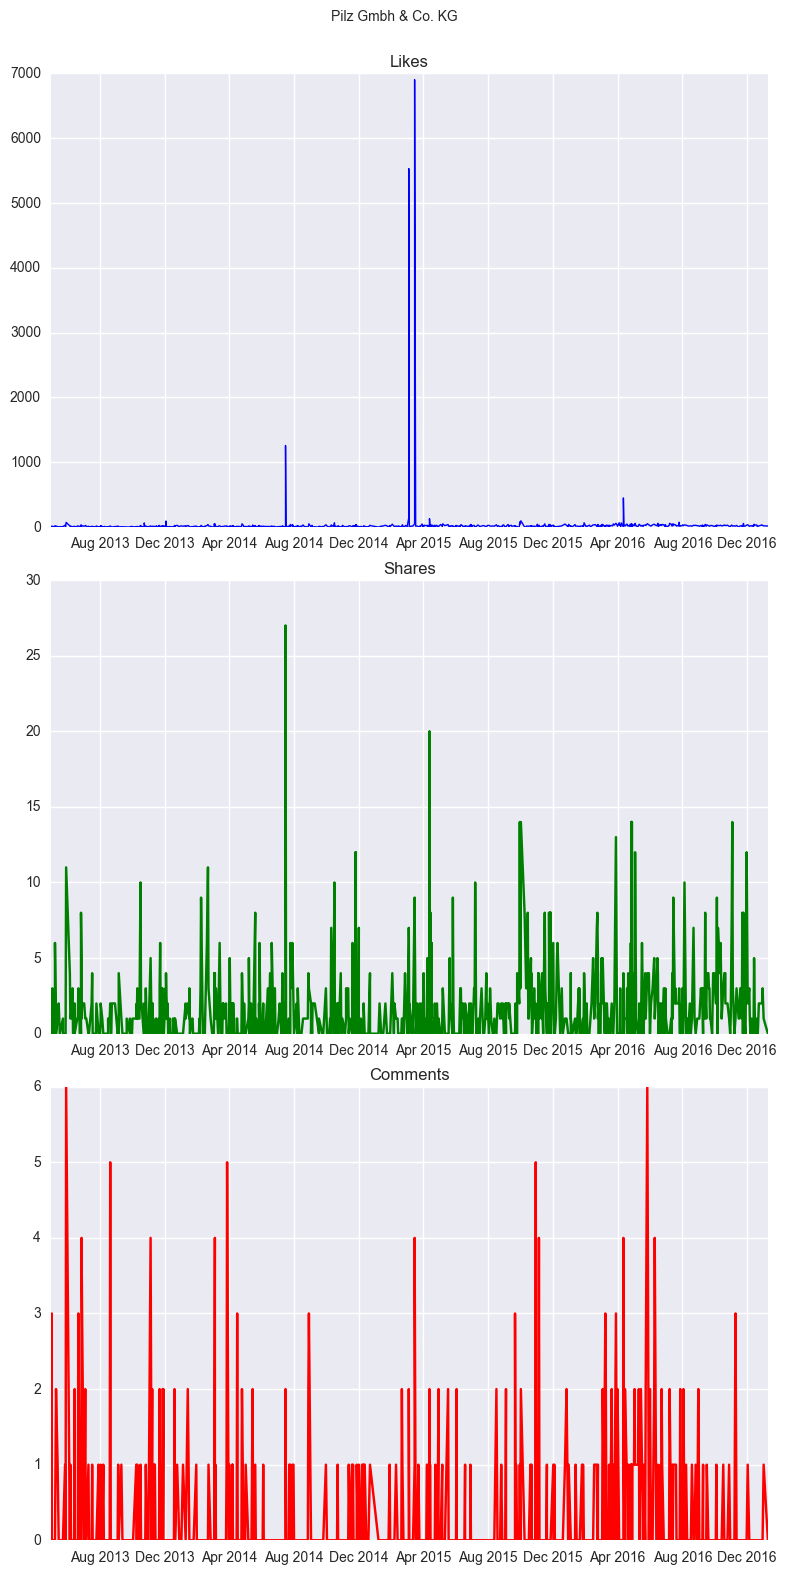

In [65]:
fig2, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))


axes[0].plot(dates,likes, 'b', label='likes', lw=1, ls='-')
axes[0].set_title('Likes')
axes[0].grid(True)

axes[1].plot(dates,shares, 'g', label='shares')
axes[1].set_title('Shares')
axes[1].grid(True)

axes[2].plot(dates,comments, 'r', label='comments')
axes[2].set_title('Comments')
axes[2].grid(True)

fig2.suptitle('Pilz Gmbh & Co. KG')
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)

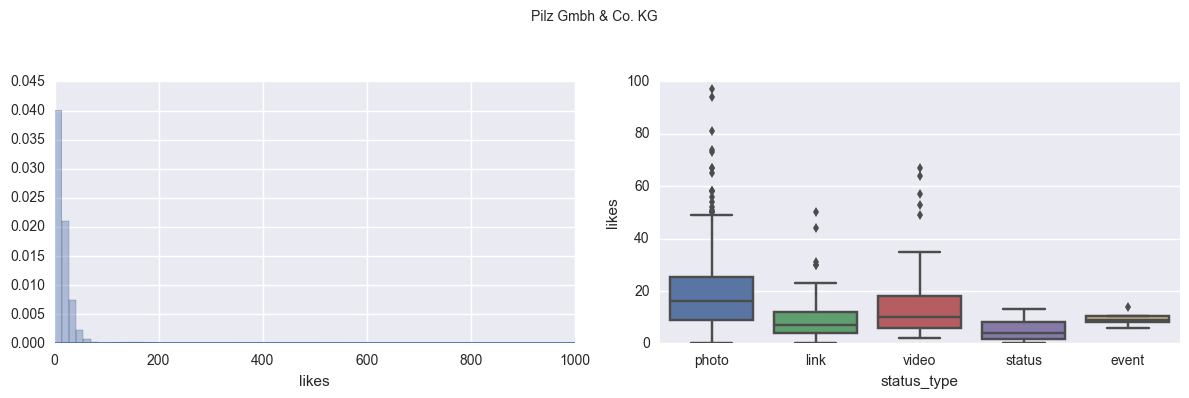

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(pilz['likes'], ax=ax1, bins=500)
sns.boxplot(x='status_type', y='likes', data=pilz, ax=ax2)

ax1.set_xlim(0, 1000)
ax2.set_ylim(0, 100)

fig.suptitle('Pilz Gmbh & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

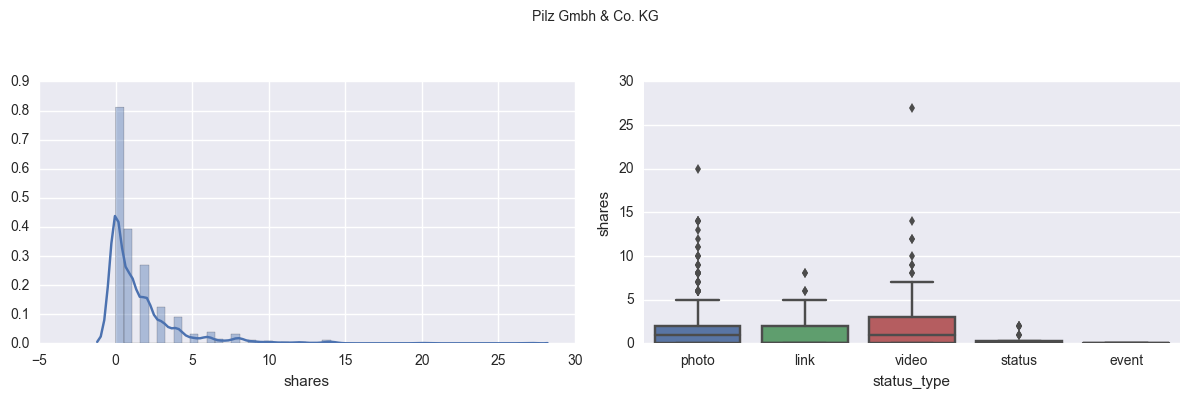

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(pilz['shares'], ax=ax1)
sns.boxplot(x='status_type', y='shares', data=pilz, ax=ax2)

fig.suptitle('Pilz Gmbh & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

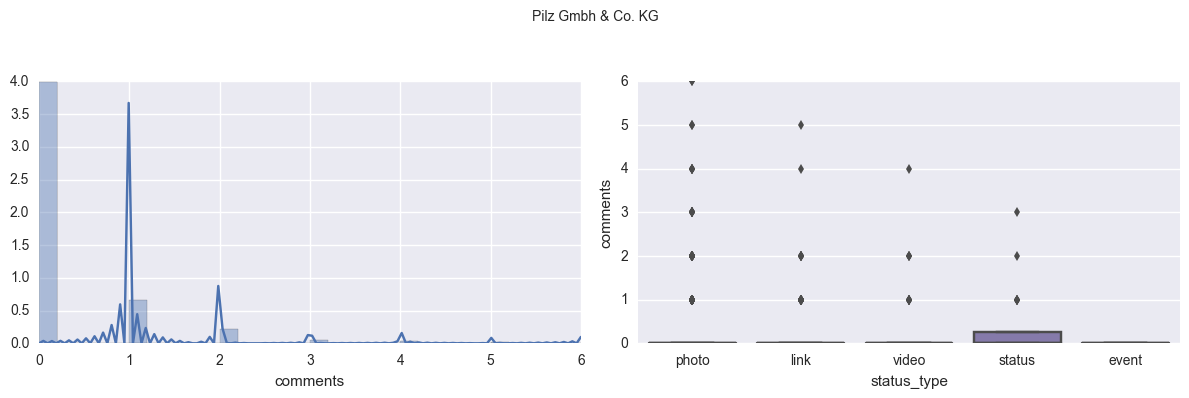

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(pilz['comments'], ax=ax1)
sns.boxplot(x='status_type', y='comments', data=pilz, ax=ax2)

fig.suptitle('Pilz Gmbh & Co. KG')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

---
<a id='arendvskonkurrenz'></a>
# <center>Arend vs. Konkurrenz</center>
---

In [69]:
kk = pd.concat([koehl, natus, blumenbecker, ksv]) # Konkurrenz

print('Anzahl Daten Arend: ', len(arend))
print('Anzahl Daten Konkurrenz: ', len(kk))

('Anzahl Daten Arend: ', 82)
('Anzahl Daten Konkurrenz: ', 661)


<center><i><u>Anmerkung:</u></i> Nur ungefährer/prozentualer Vergleich aufgrund starker Differenz bezüglich Größe der Datensätze.</center>

In [70]:
trace1 = Bar(
    x=['Arend', 'Konkurrenz'],
    y=[len(arend[arend['status_type'] == 'photo']) / len(arend) * 100, len(kk[kk['status_type'] == 'photo']) / len(kk) * 100],
    name='photo'
)

trace2 = Bar(
    x=['Arend', 'Konkurrenz'],
    y=[len(arend[arend['status_type'] == 'link']) / len(arend) * 100, len(kk[kk['status_type'] == 'link']) / len(kk) * 100],
    name='link'
)

trace3 = Bar(
    x=['Arend', 'Konkurrenz'],
    y=[len(arend[arend['status_type'] == 'status']) / len(arend) * 100, len(kk[kk['status_type'] == 'status']) / len(kk) * 100],
    name='status'
)

trace4 = Bar(
    x=['Arend', 'Konkurrenz'],
    y=[len(arend[arend['status_type'] == 'video']) / len(arend) * 100, len(kk[kk['status_type'] == 'video']) / len(kk) * 100],
    name='video'
)

trace5 = Bar(
    x=['Arend', 'Konkurrenz'],
    y=[len(arend[arend['status_type'] == 'event']) / len(arend) * 100, len(kk[kk['status_type'] == 'event']) / len(kk) * 100],
    name='event'
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = Layout(
    barmode='group',
    title='Post Type Verteilung',
    yaxis = {'title': 'in Prozent'},
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [71]:
fig = {
  "data": [
    {
      "values": arend['status_type'].value_counts(),
      "labels": arend['status_type'].value_counts().index,
      "domain": {"x": [0, .48]},
      "text": "Arend",
      "name": "Arend",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": kk['status_type'].value_counts(),
      "labels": kk['status_type'].value_counts().index,
      "text":"Konkurrenten",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Post Type Verteilung",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Arend",
                "x": 0.22,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Konkurrenz",
                "x": 0.809,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [72]:
no_feedback_arend = arend[(arend['likes']  <= 1) & (arend['comments'] <= 1) & (arend['shares'] <= 1)]
feedback_arend = len(arend) - len(no_feedback_arend)

no_feedback_kk = kk[(kk['likes']  <= 1) & (kk['comments'] <= 1) & (kk['shares'] <= 1)]
feedback_kk = len(kk) - len(no_feedback_kk)

fig = {
  "data": [
    {
      "values": [feedback_arend, len(no_feedback_arend)],
      "labels": ['Feedback', 'Kein Feedback'],
      "domain": {"x": [0, .48]},
      "text": "Arend",
      "name": "Arend",
      "hole": .4,
      "type": "pie",
      "marker": {'colors': ['green', 'red']},
    },     
    {
      "values": [feedback_kk,len(no_feedback_kk)],
      "labels": ['Feedback', 'Kein Feedback'],
      "text":"Konkurrenz",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hole": .4,
      "type": "pie",
    }],
  "layout": {
        "title":"Feedback vs. No Feedback",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Arend",
                "x": 0.22,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Konkurrenz",
                "x": 0.809,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [73]:
likes_arend = arend['likes'].sum()
comments_arend = arend['comments'].sum()
shares_arend = arend['shares'].sum()

likes_kk = kk['likes'].sum()
comments_kk = kk['comments'].sum()
shares_kk = kk['shares'].sum()

fig = {
  "data": [
    {
      "values": [likes_arend, comments_arend, shares_arend],
      "labels": ['likes', 'comments', 'shares'],
      "domain": {"x": [0, .48]},
      "text": "Arend",
      "name": "Arend",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": [likes_kk, comments_kk, shares_kk],
      "labels": ['likes', 'comments', 'shares'],
      "text":"Konkurrenz",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Konkurrenz",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Feedback Verteilung",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Arend",
                "x": 0.22,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Konkurrenz",
                "x": 0.809,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

---
<a id='branche'></a>
# <center>Branchenanalyse</center>
---

In [74]:
print(len(ms))
print(len(vu))

743
1385


In [75]:
ms.groupby('company').describe()

comments       likes      shares
company                                               
arend        count   82.000000   82.000000   82.000000
             mean     0.048780    2.817073    1.048780
             std      0.267703    2.758278    1.818305
             min      0.000000    0.000000    0.000000
             25%      0.000000    0.000000    0.000000
             50%      0.000000    2.000000    0.000000
             75%      0.000000    4.000000    1.000000
             max      2.000000   13.000000   13.000000
blumenbecker count  581.000000  581.000000  581.000000
             mean     0.994836    8.232358    0.623064
             std     11.190589   10.847344    2.269153
             min      0.000000    0.000000    0.000000
             25%      0.000000    2.000000    0.000000
             50%      0.000000    5.000000    0.000000
             75%      0.000000   11.000000    1.000000
             max    256.000000  157.000000   43.000000
ksv          count    2.000000    2.000000    2.000000
             mean     0.500000    1.500000    0.000000
             std      0.707107    2.121320    0.000000
             min      0.000000    0.000000    0.000000
             25%      0.250000    0.750000    0.000000
             50%      0.500000    1.500000    0.000000
             75%      0.750000    2.250000    0.000000
             max      1.000000    3.000000    0.000000
köhl         count   69.000000   69.000000   69.000000
             mean     0.130435    2.623188    1.652174
             std      0.450916    3.005394    2.393779
             min      0.000000    0.000000    0.000000
             25%      0.000000    0.000000    0.000000
             50%      0.000000    2.000000    1.000000
             75%      0.000000    4.000000    2.000000
             max      2.000000   15.000000   16.000000
natus        count    9.000000    9.000000    9.000000
             mean     0.111111    5.555556    0.555556
             std      0.333333    4.824705    0.881917
             min      0.000000    0.000000    0.000000
             25%      0.000000    1.000000    0.000000
             50%      0.000000    5.000000    0.000000
             75%      0.000000   11.000000    1.000000
             max      1.000000   12.000000    2.000000

In [76]:
vu.groupby('company').describe()

comments        likes      shares
company                                            
beckhoff count  477.000000   477.000000  477.000000
         mean     0.230608    12.597484    3.014675
         std      0.652457    29.976977    6.483803
         min      0.000000     0.000000    0.000000
         25%      0.000000     3.000000    0.000000
         50%      0.000000     7.000000    1.000000
         75%      0.000000    14.000000    4.000000
         max      4.000000   425.000000   76.000000
pilz     count  908.000000   908.000000  908.000000
         mean     0.313877    31.158590    1.606828
         std      0.768412   296.237146    2.535011
         min      0.000000     0.000000    0.000000
         25%      0.000000     6.000000    0.000000
         50%      0.000000    12.000000    1.000000
         75%      0.000000    21.000000    2.000000
         max      6.000000  6904.000000   27.000000

In [77]:
trace1 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[len(ms[ms['status_type'] == 'photo']) / len(ms) * 100, len(vu[vu['status_type'] == 'photo']) / len(vu) * 100],
    name='photo'
)

trace2 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[len(ms[ms['status_type'] == 'link']) / len(ms) * 100, len(vu[vu['status_type'] == 'link']) / len(vu) * 100],
    name='link'
)

trace3 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[len(ms[ms['status_type'] == 'status']) / len(ms) * 100, len(vu[vu['status_type'] == 'status']) / len(vu) * 100],
    name='status'
)

trace4 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[len(ms[ms['status_type'] == 'video']) / len(ms) * 100, len(vu[vu['status_type'] == 'video']) / len(vu) * 100],
    name='video'
)

trace5 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[len(ms[ms['status_type'] == 'event']) / len(ms) * 100, len(vu[vu['status_type'] == 'event']) / len(vu) * 100],
    name='event'
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = Layout(
    barmode='group',
    title='Post Type Verteilung',
    yaxis = {'title': 'in Prozent'},
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [78]:
fig = {
  "data": [
    {
      "values": ms['status_type'].value_counts(),
      "labels": ms['status_type'].value_counts().index,
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
      "name": "Mittelstand",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": vu['status_type'].value_counts(),
      "labels": vu['status_type'].value_counts().index,
      "text":"Vergleichsunternehmen",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Post Type Verteilung",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.845,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [79]:
no_feedback_ms = ms[(ms['likes']  <= 1) & (ms['comments'] <= 1) & (ms['shares'] <= 1)]
feedback_ms = len(ms) - len(no_feedback_ms)

no_feedback_vu = vu[(vu['likes']  <= 1) & (vu['comments'] <= 1) & (vu['shares'] <= 1)]
feedback_vu = len(vu) - len(no_feedback_vu)

fig = {
  "data": [
    {
      "values": [feedback_ms, len(no_feedback_ms)],
      "labels": ['Feedback', 'Kein Feedback'],
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
      "name": "Mittelstand",
      "hole": .4,
      "type": "pie",
      "marker": {'colors': ['green', 'red']},
    },     
    {
      "values": [feedback_vu,len(no_feedback_vu)],
      "labels": ['Feedback', 'Kein Feedback'],
      "text":"Vergleichsunternehmen",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hole": .4,
      "type": "pie",
    }],
  "layout": {
        "title":"Feedback vs. No Feedback",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

<center><i><u>Anmerkung:</u></i> Kein Feedback bedeutet kleier gleich 1 Like, Share und Kommentar pro Post.</center>

In [80]:
likes_ms = ms['likes'].sum()
comments_ms = ms['comments'].sum()
shares_ms = ms['shares'].sum()

likes_vu = vu['likes'].sum()
comments_vu = vu['comments'].sum()
shares_vu = vu['shares'].sum()

fig = {
  "data": [
    {
      "values": [likes_ms, comments_ms, shares_ms],
      "labels": ['likes', 'comments', 'shares'],
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
      "name": "Mittelstand",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": [likes_vu, comments_vu, shares_vu],
      "labels": ['likes', 'comments', 'shares'],
      "text":"Vergleichsunternehmen",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Feedback Verteilung",
        "annotations": [
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 11
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

<center><i><u>Anmerkung:</u></i> Sehr ähnliche Verteilung Feedback betreffend, trotz enormer Mengenunterschiede. Kommentare weiter verbreitet bei Mittelständlern.</center>

---
<a id='gesamtdaten'></a>
# <center>Gesamtdatensatz</center>
---

In [81]:
gesamt = pd.concat([ms, vu])
gesamt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 907
Data columns (total 10 columns):
company             2128 non-null object
status_id           2128 non-null object
status_message      1840 non-null object
link_name           2042 non-null object
status_type         2128 non-null object
status_link         2061 non-null object
status_published    2128 non-null object
likes               2128 non-null int64
comments            2128 non-null int64
shares              2128 non-null int64
dtypes: int64(3), object(7)
memory usage: 182.9+ KB


In [82]:
photos = gesamt[gesamt['status_type'] == 'photo']
photos_likes = photos['likes'].sum()
photos_comments = photos['comments'].sum()
photos_shares = photos['shares'].sum()

links = gesamt[gesamt['status_type'] == 'link']
links_likes = links['likes'].sum()
links_comments = links['comments'].sum()
links_shares = links['shares'].sum()

videos = gesamt[gesamt['status_type'] == 'video']
videos_likes = videos['likes'].sum()
videos_comments = videos['comments'].sum()
videos_shares = videos['shares'].sum()

statuses = gesamt[gesamt['status_type'] == 'status']
statuses_likes = statuses['likes'].sum()
statuses_comments = statuses['comments'].sum()
statuses_shares = statuses['shares'].sum()

events = gesamt[gesamt['status_type'] == 'event']
events_likes = events['likes'].sum()
events_comments = events['comments'].sum()
events_shares = events['shares'].sum()

trace1 = Bar(
    x=['Photo', 'Link', 'Video', 'Status', 'Event'],
    y=[photos_likes, links_likes, videos_likes, statuses_likes, events_likes],
    name='likes'
)
trace2 = Bar(
    x=['Photo', 'Link', 'Video', 'Status', 'Event'],
    y=[photos_comments, links_comments, videos_comments, statuses_comments, events_comments],
    name='comments'
)

trace3 = Bar(
    x=['Photo', 'Link', 'Video', 'Status', 'Event'],
    y=[photos_shares, links_shares, videos_shares, statuses_shares, events_shares],
    name='shares'
)
data = [trace1, trace2, trace3]
layout = Layout(
    barmode='group',
    title='Feedback nach Post Type'
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [134]:
total['status_published'] = pd.to_datetime(total['status_published'])

In [143]:
total['Stunde'] = total['status_published'].apply(lambda time: time.hour)
total['Monat'] = total['status_published'].apply(lambda time: time.month)
total['Wochentag'] = total['status_published'].apply(lambda time: time.dayofweek)

In [144]:
dmap = {0:'Mo',1:'Di',2:'Mi',3:'Do',4:'Fr',5:'Sa',6:'So'}
total['Wochentag'] = total['Wochentag'].map(lambda day: '{}'.format(dmap[day]))

In [166]:
total_heat = total.groupby(['Wochentag', 'Stunde']).count().unstack()['likes']
total_heat = total_heat.fillna(0)

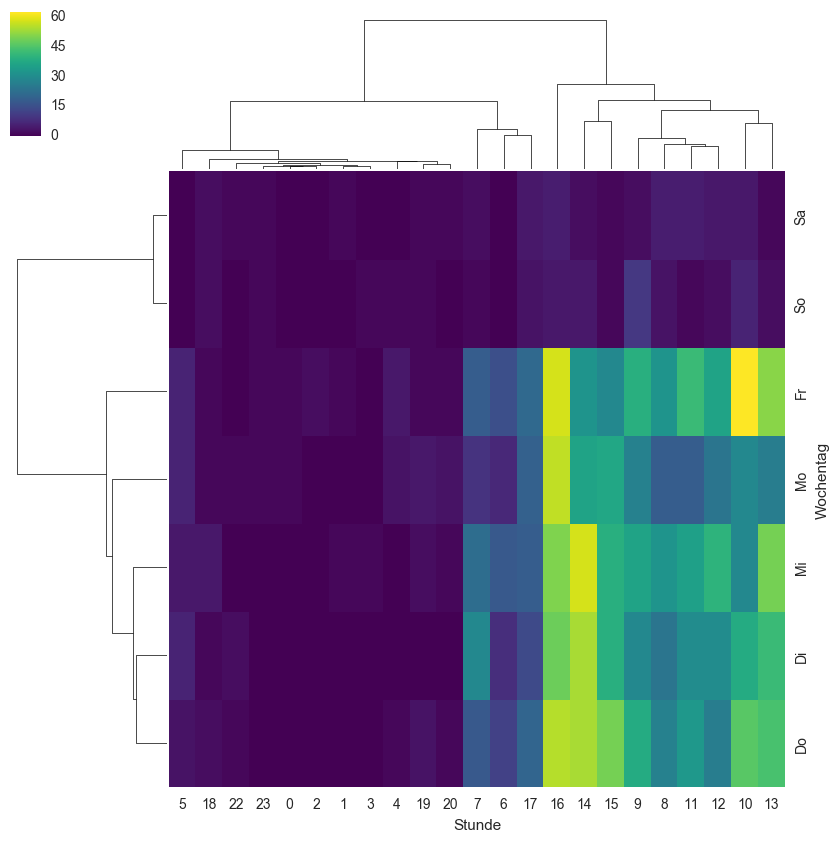

In [167]:
g = sns.clustermap(total_heat, cmap='viridis')
g.savefig('Facebook Cluster.png', dpi=300)

<center><a href='#content'>Zum Anfang</a></center>

<style><link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css'>
</style>
        <span class="text-muted pull-left"><i class="fa fa-copyright" aria-hidden="true"></i> by Jan Pascal Kunkler | 2017</span>
        <span class='text-muted pull-right'>
            <a href='#'><i class="fa fa-google-plus pull-right fa-lg" aria-hidden="true" target=_blank></i><a>
            <a href='http://linkedin.com/in/jpkunkler' target=_blank><i class="fa fa-linkedin pull-right fa-lg" aria-hidden="true"></i></a>
            <a href='http://twitter.com/jpkunkler' target=_blank><i class="fa fa-twitter pull-right fa-lg" aria-hidden="true"></i></a>
            <a href='http://facebook.com/jpkunkler' target=_blank><i class="fa fa-facebook pull-right fa-lg" aria-hidden="true"></i></a>
        </span>